# 1. Data preprocessing

In [1]:
import warnings                                  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import openpyxl

import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_excel('20414280.xlsx', index_col=0)
data.head()

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"
601339.SH,2012-06-12,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,1.040385,...,873.0,508.0,143.0,109.0,107.0,103.0,89.0,116,115,81
600215.SH,1999-09-09,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,11.518963,...,112.0,112.0,117.0,114.0,115.0,118.0,119.0,118,117,115
002361.SZ,2010-03-03,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,3.884774,...,33.0,117.0,75.0,59.0,59.0,77.0,112.0,116,101,119
600391.SH,2001-12-12,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,2.965874,...,106.0,89.0,102.0,80.0,81.0,90.0,89.0,91,93,85
002481.SZ,2010-09-21,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,2.434388,...,243.0,26.0,81.0,114.0,107.0,119.0,107.0,117,108,106


In [3]:
data.tail()

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"
600710.SH,1996-07-01,Commercial trade,1,2015,1.074933,1.027029,1.016288,1.265547,1.130250,0.724354,...,42.0,31.0,60.0,33.0,109.0,115.0,90.0,110,79,85
600053.SH,1997-04-18,Non bank finance,1,0,0.108124,0.459955,0.781887,0.974876,0.690543,0.604348,...,75.0,81.0,108.0,106.0,105.0,98.0,33.0,119,80,117
000058.SZ,1996-12-26,Commercial trade,1,2006,2.209581,1.673051,1.028683,0.700384,1.134651,0.816262,...,112.0,88.0,87.0,89.0,79.0,87.0,90.0,108,114,120
002513.SZ,2010-12-03,chemical industry,1,"2011,2012,2013,2014,2015,2016,2017",NaN,NaN,1.005263,1.358363,0.485555,4.405261,...,316.0,109.0,87.0,85.0,84.0,104.0,117.0,80,118,106
600730.SH,1996-07-26,comprehensive,1,"2013,2014",0.789055,0.522244,1.164324,0.951773,0.726726,0.994667,...,114.0,119.0,101.0,117.0,120.0,120.0,120.0,119,116,115


In [4]:
data.shape

(2500, 160)

In [110]:
# Deleting data from the bank industry
list1 = data[data['Industry']=='bank'].index
data.drop(list1, inplace=True, axis=0)

In [111]:
data[data['Industry']=='bank']

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"


In [112]:
# Deleting data of Year of Fraud=0
list2 = data[data['Year of Fraud']==str(0)].index
data.drop(list2, inplace=True, axis=0)

In [113]:
data[data['Year of Fraud']==str(0)]

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"


In [114]:
list1 = range(4,173,13)
list2 = range(17,173,13)
dic = {}
names = ['asset_index', 'leverage_ratio', 'net_profit_ratio', 'sales_revenue', 'net_profit', 'turnover_of_total_assets', 
        'receivable_turnover', 'inventory', 'accounts_receivable', 'sales_management_expenses', 'audit_by_big4', 
        'time_lag_of_annual_report_disclosure']
for i,j,name in zip(list1,list2,names):
    dic[name] = data.iloc[:,i:j]


In [115]:
dic['inventory']

,"('Inventory Growth Rate from 2006 to 2018', 2006)","('Inventory Growth Rate from 2006 to 2018', 2007)","('Inventory Growth Rate from 2006 to 2018', 2008)","('Inventory Growth Rate from 2006 to 2018', 2009)","('Inventory Growth Rate from 2006 to 2018', 2010)","('Inventory Growth Rate from 2006 to 2018', 2011)","('Inventory Growth Rate from 2006 to 2018', 2012)","('Inventory Growth Rate from 2006 to 2018', 2013)","('Inventory Growth Rate from 2006 to 2018', 2014)","('Inventory Growth Rate from 2006 to 2018', 2015)","('Inventory Growth Rate from 2006 to 2018', 2016)","('Inventory Growth Rate from 2006 to 2018', 2017)","('Inventory Growth Rate from 2006 to 2018', 2018)"
601339.SH,NaN,NaN,NaN,1.493624,0.940538,1.166870,0.675763,1.045133,1.297043,1.306645,0.752372,1.166435,1.500561
600215.SH,3.356673,0.107287,0.103885,53.058539,2.178008,0.607678,1.282011,1.116188,0.879856,0.955209,0.921020,0.962099,0.719529
002361.SZ,NaN,1.244018,0.508578,1.089829,1.284842,1.178202,1.968261,0.768806,1.780014,0.877648,1.557998,1.242642,1.440991
600391.SH,1.264265,1.680827,1.237072,1.182685,1.102208,1.627468,1.215004,1.015311,1.161881,1.318980,1.258435,1.101511,1.106228
002481.SZ,NaN,NaN,1.020480,1.001251,1.367491,2.107161,0.626910,1.223169,1.070132,1.051108,0.820308,2.360317,0.435361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,NaN,NaN,1.191072,1.281280,1.792895,1.647916,1.440645,1.744727,1.265832,1.202089,1.472227,1.002811,1.169488
600710.SH,0.908867,1.136432,1.138486,0.694833,1.552623,1.089110,0.773793,0.819968,0.767372,0.676300,14.867380,1.164241,1.056650
000058.SZ,1.212998,0.030506,1.024853,1.067118,0.714510,0.150635,4.285537,36.094461,2.839581,1.619978,1.335593,5.897870,0.751962
002513.SZ,NaN,NaN,0.905129,1.072169,2.099232,1.091962,2.249485,0.945853,0.928075,1.055853,0.787002,0.893226,0.830722


In [116]:
# Combine data of the same category in one dataframe
asset_index = data.columns[4:17]
leverage_ratio = data.columns[17:30]
net_profit_ratio = data.columns[30:43]
sales_revenue = data.columns[43:56]
net_profit = data.columns[56:69]
turnover_of_total_assets = data.columns[69:82]
receivable_turnover = data.columns[82:95]
inventory = data.columns[95:108]
accounts_receivable = data.columns[108:121]
sales_management_expenses = data.columns[121:134]
audit_by_big4 = data.columns[134:147]
time_lag_of_annual_report_disclosure = data.columns[147:160]

data[inventory]

,"('Inventory Growth Rate from 2006 to 2018', 2006)","('Inventory Growth Rate from 2006 to 2018', 2007)","('Inventory Growth Rate from 2006 to 2018', 2008)","('Inventory Growth Rate from 2006 to 2018', 2009)","('Inventory Growth Rate from 2006 to 2018', 2010)","('Inventory Growth Rate from 2006 to 2018', 2011)","('Inventory Growth Rate from 2006 to 2018', 2012)","('Inventory Growth Rate from 2006 to 2018', 2013)","('Inventory Growth Rate from 2006 to 2018', 2014)","('Inventory Growth Rate from 2006 to 2018', 2015)","('Inventory Growth Rate from 2006 to 2018', 2016)","('Inventory Growth Rate from 2006 to 2018', 2017)","('Inventory Growth Rate from 2006 to 2018', 2018)"
601339.SH,NaN,NaN,NaN,1.493624,0.940538,1.166870,0.675763,1.045133,1.297043,1.306645,0.752372,1.166435,1.500561
600215.SH,3.356673,0.107287,0.103885,53.058539,2.178008,0.607678,1.282011,1.116188,0.879856,0.955209,0.921020,0.962099,0.719529
002361.SZ,NaN,1.244018,0.508578,1.089829,1.284842,1.178202,1.968261,0.768806,1.780014,0.877648,1.557998,1.242642,1.440991
600391.SH,1.264265,1.680827,1.237072,1.182685,1.102208,1.627468,1.215004,1.015311,1.161881,1.318980,1.258435,1.101511,1.106228
002481.SZ,NaN,NaN,1.020480,1.001251,1.367491,2.107161,0.626910,1.223169,1.070132,1.051108,0.820308,2.360317,0.435361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,NaN,NaN,1.191072,1.281280,1.792895,1.647916,1.440645,1.744727,1.265832,1.202089,1.472227,1.002811,1.169488
600710.SH,0.908867,1.136432,1.138486,0.694833,1.552623,1.089110,0.773793,0.819968,0.767372,0.676300,14.867380,1.164241,1.056650
000058.SZ,1.212998,0.030506,1.024853,1.067118,0.714510,0.150635,4.285537,36.094461,2.839581,1.619978,1.335593,5.897870,0.751962
002513.SZ,NaN,NaN,0.905129,1.072169,2.099232,1.091962,2.249485,0.945853,0.928075,1.055853,0.787002,0.893226,0.830722


### 1.1 Check the missing values

In [117]:
print(dic['asset_index'].isnull().any())
print(dic['leverage_ratio'].isnull().any())
print(dic['net_profit_ratio'].isnull().any())
print(dic['sales_revenue'].isnull().any())
print(dic['net_profit'].isnull().any())
print(dic['turnover_of_total_assets'].isnull().any())
print(dic['receivable_turnover'].isnull().any())
print(dic['inventory'].isnull().any())
print(dic['accounts_receivable'].isnull().any())
print(dic['sales_management_expenses'].isnull().any())
print(dic['audit_by_big4'].isnull().any())
print(dic['time_lag_of_annual_report_disclosure'].isnull().any())


('Asset Index from year 2006 to 2018', 2006)    True
('Asset Index from year 2006 to 2018', 2007)    True
('Asset Index from year 2006 to 2018', 2008)    True
('Asset Index from year 2006 to 2018', 2009)    True
('Asset Index from year 2006 to 2018', 2010)    True
('Asset Index from year 2006 to 2018', 2011)    True
('Asset Index from year 2006 to 2018', 2012)    True
('Asset Index from year 2006 to 2018', 2013)    True
('Asset Index from year 2006 to 2018', 2014)    True
('Asset Index from year 2006 to 2018', 2015)    True
('Asset Index from year 2006 to 2018', 2016)    True
('Asset Index from year 2006 to 2018', 2017)    True
('Asset Index from year 2006 to 2018', 2018)    True
dtype: bool
('Leverage Ratio from year 2006 to 2018', 2006)     True
('Leverage Ratio from year 2006 to 2018', 2007)     True
('Leverage Ratio from year 2006 to 2018', 2008)     True
('Leverage Ratio from year 2006 to 2018', 2009)     True
('Leverage Ratio from year 2006 to 2018', 2010)     True
('Leverage Rat

<AxesSubplot:>

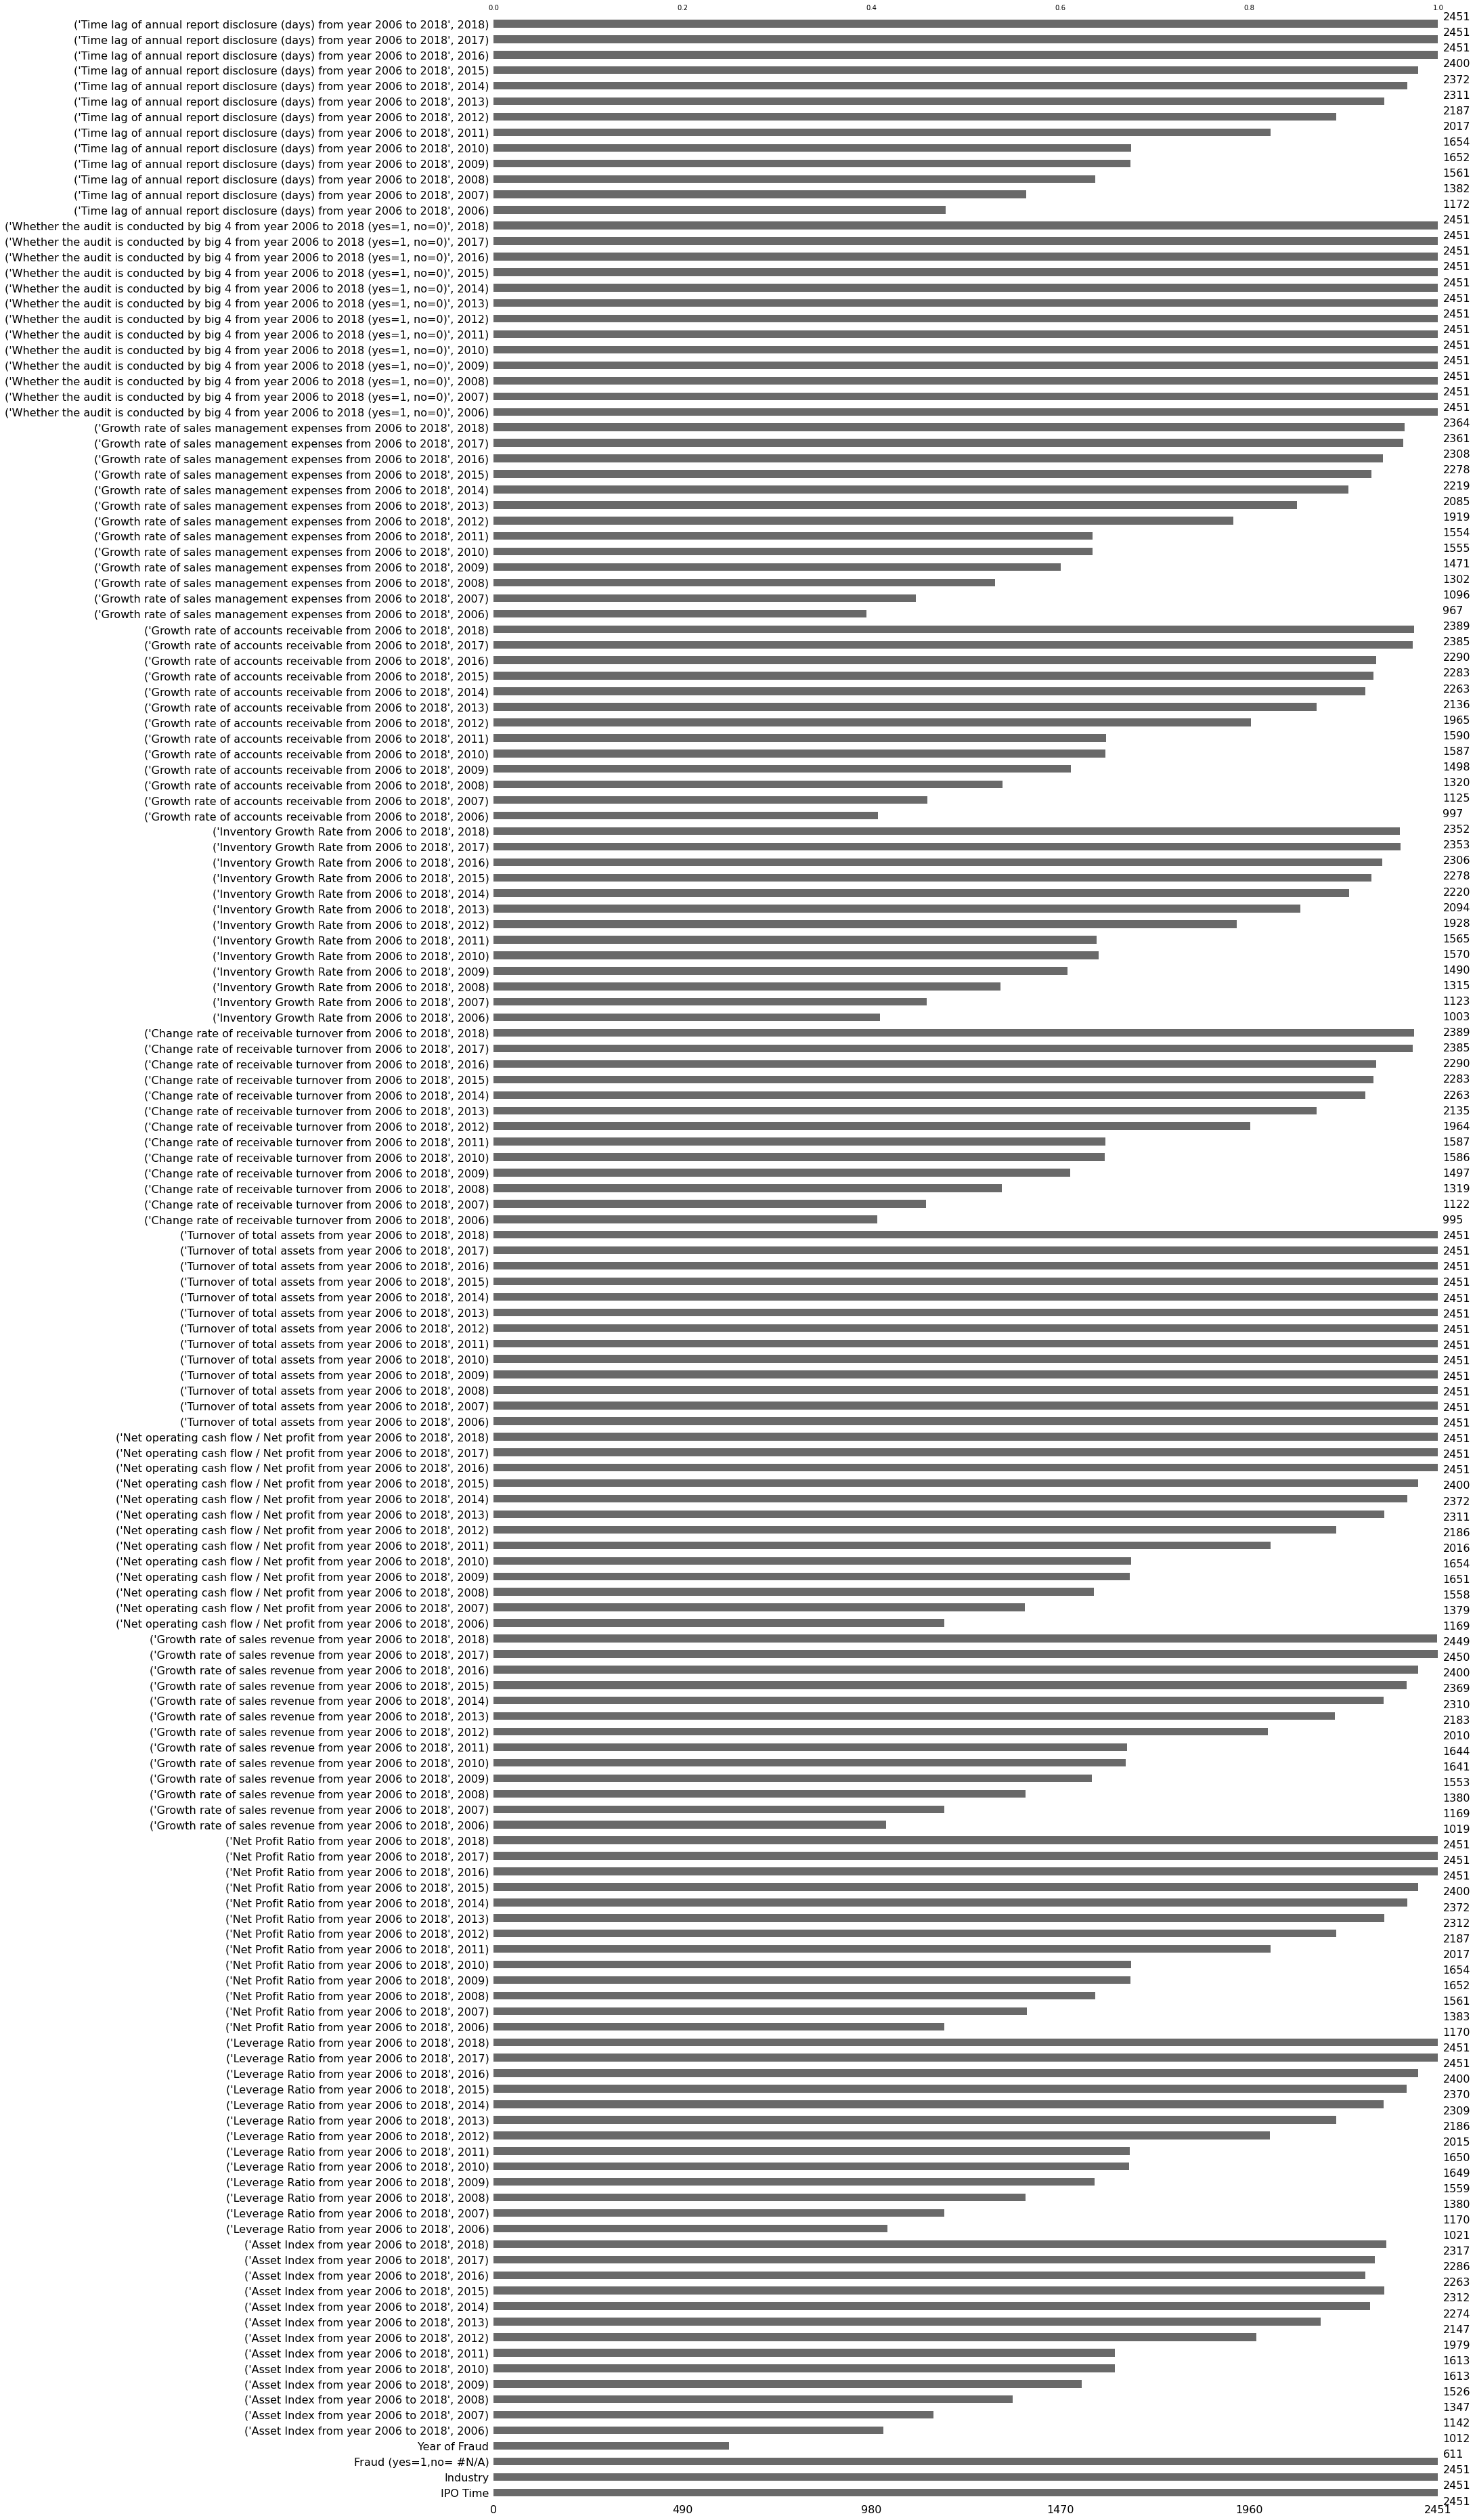

In [118]:
import missingno as msno
msno.bar(data)

### 1.2 Check the dtypes

In [119]:
print(data['IPO Time'].dtypes)
print(data['Industry'].dtypes)
print(data['Fraud (yes=1,no= #N/A)'].dtypes)
print(data['Year of Fraud'].dtypes)

object
object
int64
object


In [120]:
print(dic['asset_index'].dtypes)
print(dic['leverage_ratio'].dtypes)
print(dic['net_profit_ratio'].dtypes)
print(dic['sales_revenue'].dtypes)
print(dic['net_profit'].dtypes)
print(dic['turnover_of_total_assets'].dtypes)
print(dic['receivable_turnover'].dtypes)
print(dic['inventory'].dtypes)
print(dic['accounts_receivable'].dtypes)
print(dic['sales_management_expenses'].dtypes)
print(dic['audit_by_big4'].dtypes)
print(dic['time_lag_of_annual_report_disclosure'].dtypes)

('Asset Index from year 2006 to 2018', 2006)    float64
('Asset Index from year 2006 to 2018', 2007)    float64
('Asset Index from year 2006 to 2018', 2008)    float64
('Asset Index from year 2006 to 2018', 2009)    float64
('Asset Index from year 2006 to 2018', 2010)    float64
('Asset Index from year 2006 to 2018', 2011)    float64
('Asset Index from year 2006 to 2018', 2012)    float64
('Asset Index from year 2006 to 2018', 2013)    float64
('Asset Index from year 2006 to 2018', 2014)    float64
('Asset Index from year 2006 to 2018', 2015)    float64
('Asset Index from year 2006 to 2018', 2016)    float64
('Asset Index from year 2006 to 2018', 2017)    float64
('Asset Index from year 2006 to 2018', 2018)    float64
dtype: object
('Leverage Ratio from year 2006 to 2018', 2006)    float64
('Leverage Ratio from year 2006 to 2018', 2007)    float64
('Leverage Ratio from year 2006 to 2018', 2008)    float64
('Leverage Ratio from year 2006 to 2018', 2009)    float64
('Leverage Ratio from 

In [121]:
data[turnover_of_total_assets] = data[turnover_of_total_assets].replace('--', np.nan)
data[turnover_of_total_assets] = pd.DataFrame(data[turnover_of_total_assets],dtype=np.float)
data[inventory] = pd.DataFrame(data[inventory],dtype=np.float)
data[audit_by_big4] = data[audit_by_big4].replace('--', '2')
data[audit_by_big4] = pd.DataFrame(data[audit_by_big4],dtype=np.float)
data[time_lag_of_annual_report_disclosure] = pd.DataFrame(data[time_lag_of_annual_report_disclosure],dtype=np.float)


In [122]:
print(dic['asset_index'].dtypes)
print(dic['leverage_ratio'].dtypes)
print(dic['net_profit_ratio'].dtypes)
print(dic['sales_revenue'].dtypes)
print(dic['net_profit'].dtypes)
print(dic['turnover_of_total_assets'].dtypes)
print(dic['receivable_turnover'].dtypes)
print(dic['inventory'].dtypes)
print(dic['accounts_receivable'].dtypes)
print(dic['sales_management_expenses'].dtypes)
print(dic['audit_by_big4'].dtypes)
print(dic['time_lag_of_annual_report_disclosure'].dtypes)

('Asset Index from year 2006 to 2018', 2006)    float64
('Asset Index from year 2006 to 2018', 2007)    float64
('Asset Index from year 2006 to 2018', 2008)    float64
('Asset Index from year 2006 to 2018', 2009)    float64
('Asset Index from year 2006 to 2018', 2010)    float64
('Asset Index from year 2006 to 2018', 2011)    float64
('Asset Index from year 2006 to 2018', 2012)    float64
('Asset Index from year 2006 to 2018', 2013)    float64
('Asset Index from year 2006 to 2018', 2014)    float64
('Asset Index from year 2006 to 2018', 2015)    float64
('Asset Index from year 2006 to 2018', 2016)    float64
('Asset Index from year 2006 to 2018', 2017)    float64
('Asset Index from year 2006 to 2018', 2018)    float64
dtype: object
('Leverage Ratio from year 2006 to 2018', 2006)    float64
('Leverage Ratio from year 2006 to 2018', 2007)    float64
('Leverage Ratio from year 2006 to 2018', 2008)    float64
('Leverage Ratio from year 2006 to 2018', 2009)    float64
('Leverage Ratio from 

### 1.3 Data splitting 

In [123]:
# Create status columns for 2006-2018
for i in range(2006, 2019):
    data['status_' + str(i)] = 0

data

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,status_2009,status_2010,status_2011,status_2012,status_2013,status_2014,status_2015,status_2016,status_2017,status_2018
601339.SH,2012-06-12,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,1.040385,...,0,0,0,0,0,0,0,0,0,0
600215.SH,1999-09-09,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,11.518963,...,0,0,0,0,0,0,0,0,0,0
002361.SZ,2010-03-03,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,3.884774,...,0,0,0,0,0,0,0,0,0,0
600391.SH,2001-12-12,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,2.965874,...,0,0,0,0,0,0,0,0,0,0
002481.SZ,2010-09-21,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,2.434388,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,2010-12-15,Medical Biology,1,"2010,2011,2012",NaN,NaN,0.522089,0.577352,0.344852,3.290737,...,0,0,0,0,0,0,0,0,0,0
600710.SH,1996-07-01,Commercial trade,1,2015,1.074933,1.027029,1.016288,1.265547,1.130250,0.724354,...,0,0,0,0,0,0,0,0,0,0
000058.SZ,1996-12-26,Commercial trade,1,2006,2.209581,1.673051,1.028683,0.700384,1.134651,0.816262,...,0,0,0,0,0,0,0,0,0,0
002513.SZ,2010-12-03,chemical industry,1,"2011,2012,2013,2014,2015,2016,2017",NaN,NaN,1.005263,1.358363,0.485555,4.405261,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Split years in the "Year of Fraud" and store them to their corresponding years(status_20XX: yes=1,no= 0)
for i in range(len(data)):
    year_of_fraud = str(data.iloc[i, 3])
    if year_of_fraud == 'nan' or year_of_fraud == '0':
        continue

    list_year_of_fraud = year_of_fraud.split(sep=',')
    for j in range(2006, 2019):
        if str(j) in list_year_of_fraud:
            data.iloc[i, (j-1846)] = 1

data

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,status_2009,status_2010,status_2011,status_2012,status_2013,status_2014,status_2015,status_2016,status_2017,status_2018
601339.SH,2012-06-12,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,1.040385,...,0,0,0,0,0,0,0,0,0,0
600215.SH,1999-09-09,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,11.518963,...,0,0,0,0,0,0,0,0,0,0
002361.SZ,2010-03-03,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,3.884774,...,0,0,0,0,0,0,0,0,0,0
600391.SH,2001-12-12,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,2.965874,...,0,0,0,0,0,0,0,0,0,0
002481.SZ,2010-09-21,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,2.434388,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,2010-12-15,Medical Biology,1,"2010,2011,2012",NaN,NaN,0.522089,0.577352,0.344852,3.290737,...,0,1,1,1,0,0,0,0,0,0
600710.SH,1996-07-01,Commercial trade,1,2015,1.074933,1.027029,1.016288,1.265547,1.130250,0.724354,...,0,0,0,0,0,0,1,0,0,0
000058.SZ,1996-12-26,Commercial trade,1,2006,2.209581,1.673051,1.028683,0.700384,1.134651,0.816262,...,0,0,0,0,0,0,0,0,0,0
002513.SZ,2010-12-03,chemical industry,1,"2011,2012,2013,2014,2015,2016,2017",NaN,NaN,1.005263,1.358363,0.485555,4.405261,...,0,0,1,1,1,1,1,1,1,0


# 2. Data exploration

In [125]:
# load the data for exploration
data1 = pd.read_excel('20414280.xlsx', index_col=0)
data1.head()

,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"
601339.SH,2012-06-12,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,1.040385,...,873.0,508.0,143.0,109.0,107.0,103.0,89.0,116,115,81
600215.SH,1999-09-09,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,11.518963,...,112.0,112.0,117.0,114.0,115.0,118.0,119.0,118,117,115
002361.SZ,2010-03-03,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,3.884774,...,33.0,117.0,75.0,59.0,59.0,77.0,112.0,116,101,119
600391.SH,2001-12-12,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,2.965874,...,106.0,89.0,102.0,80.0,81.0,90.0,89.0,91,93,85
002481.SZ,2010-09-21,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,2.434388,...,243.0,26.0,81.0,114.0,107.0,119.0,107.0,117,108,106


In [126]:
data1.drop(['IPO Time'], axis=1)

,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)","('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"
601339.SH,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,1.040385,1.641820,...,873.0,508.0,143.0,109.0,107.0,103.0,89.0,116,115,81
600215.SH,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,11.518963,0.814912,...,112.0,112.0,117.0,114.0,115.0,118.0,119.0,118,117,115
002361.SZ,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,3.884774,0.819997,...,33.0,117.0,75.0,59.0,59.0,77.0,112.0,116,101,119
600391.SH,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,2.965874,1.388578,...,106.0,89.0,102.0,80.0,81.0,90.0,89.0,91,93,85
002481.SZ,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,2.434388,0.298381,...,243.0,26.0,81.0,114.0,107.0,119.0,107.0,117,108,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600710.SH,Commercial trade,1,2015,1.074933,1.027029,1.016288,1.265547,1.130250,0.724354,1.024618,...,42.0,31.0,60.0,33.0,109.0,115.0,90.0,110,79,85
600053.SH,Non bank finance,1,0,0.108124,0.459955,0.781887,0.974876,0.690543,0.604348,35.746449,...,75.0,81.0,108.0,106.0,105.0,98.0,33.0,119,80,117
000058.SZ,Commercial trade,1,2006,2.209581,1.673051,1.028683,0.700384,1.134651,0.816262,1.112279,...,112.0,88.0,87.0,89.0,79.0,87.0,90.0,108,114,120
002513.SZ,chemical industry,1,"2011,2012,2013,2014,2015,2016,2017",NaN,NaN,1.005263,1.358363,0.485555,4.405261,0.409184,...,316.0,109.0,87.0,85.0,84.0,104.0,117.0,80,118,106


In [127]:
# Store the year separately
data1['IPO Time'] = pd.to_datetime(data['IPO Time'])
IPO_year = data1['IPO Time'].dt.year
IPO_year

601339.SH    2012.0
600215.SH    1999.0
002361.SZ    2010.0
600391.SH    2001.0
002481.SZ    2010.0
              ...  
600710.SH    1996.0
600053.SH       NaN
000058.SZ    1996.0
002513.SZ    2010.0
600730.SH    1996.0
Name: IPO Time, Length: 2500, dtype: float64

In [128]:
data1.insert(0,'IPO Year',IPO_year)

In [129]:
data1

,IPO Year,IPO Time,Industry,"Fraud (yes=1,no= #N/A)",Year of Fraud,"('Asset Index from year 2006 to 2018', 2006)","('Asset Index from year 2006 to 2018', 2007)","('Asset Index from year 2006 to 2018', 2008)","('Asset Index from year 2006 to 2018', 2009)","('Asset Index from year 2006 to 2018', 2010)",...,"('Time lag of annual report disclosure (days) from year 2006 to 2018', 2009)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2010)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2018)"
601339.SH,2012.0,2012-06-12,Textile clothing,0,NaN,NaN,NaN,NaN,1.232247,2.220678,...,873.0,508.0,143.0,109.0,107.0,103.0,89.0,116,115,81
600215.SH,1999.0,1999-09-09,real estate,0,NaN,0.177580,0.797685,1.704945,1.171404,0.364446,...,112.0,112.0,117.0,114.0,115.0,118.0,119.0,118,117,115
002361.SZ,2010.0,2010-03-03,chemical industry,0,NaN,NaN,0.626750,7.421907,0.723292,0.472198,...,33.0,117.0,75.0,59.0,59.0,77.0,112.0,116,101,119
600391.SH,2001.0,2001-12-12,National defense industry,0,NaN,2.159582,0.576751,0.685587,0.543227,0.842075,...,106.0,89.0,102.0,80.0,81.0,90.0,89.0,91,93,85
002481.SZ,2010.0,2010-09-21,Food and beverage,0,NaN,NaN,NaN,3.351243,1.688841,1.518989,...,243.0,26.0,81.0,114.0,107.0,119.0,107.0,117,108,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600710.SH,1996.0,1996-07-01,Commercial trade,1,2015,1.074933,1.027029,1.016288,1.265547,1.130250,...,42.0,31.0,60.0,33.0,109.0,115.0,90.0,110,79,85
600053.SH,NaN,NaT,Non bank finance,1,0,0.108124,0.459955,0.781887,0.974876,0.690543,...,75.0,81.0,108.0,106.0,105.0,98.0,33.0,119,80,117
000058.SZ,1996.0,1996-12-26,Commercial trade,1,2006,2.209581,1.673051,1.028683,0.700384,1.134651,...,112.0,88.0,87.0,89.0,79.0,87.0,90.0,108,114,120
002513.SZ,2010.0,2010-12-03,chemical industry,1,"2011,2012,2013,2014,2015,2016,2017",NaN,NaN,1.005263,1.358363,0.485555,...,316.0,109.0,87.0,85.0,84.0,104.0,117.0,80,118,106


In [130]:
dic1 = {}

list3 = range(4,17)
list4 = range(2006,2019)

for i,j in zip(list3,list4):
    dic1[str(j)] = data.iloc[:,i:175:13]
    

In [131]:
dic1['2018'].columns = ['Asset Index', 'Leverage Ratio', 'Net Profit Ratio', 'Growth rate of sales revenue', 'Net operating cash flow / Net profit',
                     'Turnover of total assets', 'Change rate of receivable turnover', 'Inventory Growth Rate', 'Growth rate of accounts receivable',
                     'Growth rate of sales management expenses', 'Whether the audit is conducted by big 4', 'Time lag of annual report disclosure (days)',
                     'Fraud (yes=1,no= #N/A)']


In [132]:
# Combine the data of the same year in one dataframe
data_2006 = data.iloc[:,4:175:13]
data_2007 = data.iloc[:,5:175:13]
data_2008 = data.iloc[:,6:175:13]
data_2009 = data.iloc[:,7:175:13]
data_2010 = data.iloc[:,8:175:13]
data_2011 = data.iloc[:,9:175:13]
data_2012 = data.iloc[:,10:175:13]
data_2013 = data.iloc[:,11:175:13]
data_2014 = data.iloc[:,12:175:13]
data_2015 = data.iloc[:,13:175:13]
data_2016 = data.iloc[:,14:175:13]
data_2017 = data.iloc[:,15:175:13]
data_2018 = data.iloc[:,16:175:13]

In [133]:
# Change the colunmn names of each dataframe
def change_columns_name(name):
    name.columns = ['Asset Index', 'Leverage Ratio', 'Net Profit Ratio', 'Growth rate of sales revenue', 'Net operating cash flow / Net profit',
                     'Turnover of total assets', 'Change rate of receivable turnover', 'Inventory Growth Rate', 'Growth rate of accounts receivable',
                     'Growth rate of sales management expenses', 'Whether the audit is conducted by big 4', 'Time lag of annual report disclosure (days)',
                     'Fraud (yes=1,no= #N/A)']


In [134]:
change_columns_name(data_2006)
change_columns_name(data_2007)
change_columns_name(data_2008)
change_columns_name(data_2009)
change_columns_name(data_2010)
change_columns_name(data_2011)
change_columns_name(data_2012)
change_columns_name(data_2013)
change_columns_name(data_2014)
change_columns_name(data_2015)
change_columns_name(data_2016)
change_columns_name(data_2017)
change_columns_name(data_2018)

In [135]:
# Store the year separately
data['IPO Time'] = pd.to_datetime(data['IPO Time'])
IPO_year = data['IPO Time'].dt.year
IPO_year

601339.SH    2012
600215.SH    1999
002361.SZ    2010
600391.SH    2001
002481.SZ    2010
             ... 
300147.SZ    2010
600710.SH    1996
000058.SZ    1996
002513.SZ    2010
600730.SH    1996
Name: IPO Time, Length: 2451, dtype: int64

In [136]:
# insert columns
def insert_columns(name, year):
    name.insert(0,'Year',year)
    name.insert(1,'IPO Year',IPO_year)
    name.insert(2,'Industry',data['Industry'])

In [137]:
insert_columns(data_2006, 2006)
insert_columns(data_2007, 2007)
insert_columns(data_2008, 2008)
insert_columns(data_2009, 2009)
insert_columns(data_2010, 2010)
insert_columns(data_2011, 2011)
insert_columns(data_2012, 2012)
insert_columns(data_2013, 2013)
insert_columns(data_2014, 2014)
insert_columns(data_2015, 2015)
insert_columns(data_2016, 2016)
insert_columns(data_2017, 2017)
insert_columns(data_2018, 2018)

In [138]:
# Combine all dataframes into one dataframe 'all_year'
frames = [data_2006, data_2007, data_2008, data_2009, data_2010, data_2011, data_2012, data_2013, data_2014, 
          data_2015, data_2016, data_2017, data_2018]

all_year = pd.concat(frames)
all_year

,Year,IPO Year,Industry,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales management expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),"Fraud (yes=1,no= #N/A)"
601339.SH,2006,2012,Textile clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0
600215.SH,2006,1999,real estate,0.177580,1.017547,-0.328361,0.512833,-6.396382,0.0399,3.044677,3.356673,1.561411,2.642715,0.0,110.0,0
002361.SZ,2006,2010,chemical industry,NaN,NaN,0.684553,NaN,0.109624,1.3040,NaN,NaN,NaN,NaN,2.0,1065.0,0
600391.SH,2006,2001,National defense industry,2.159582,1.308504,0.803930,1.354518,1.050751,0.6862,1.026628,1.264265,1.390585,0.935912,0.0,31.0,0
002481.SZ,2006,2010,Food and beverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,2018,2010,Medical Biology,1.080171,0.922597,0.698039,1.144897,1.037143,0.2803,0.903138,1.169488,1.034000,0.991681,0.0,120.0,0
600710.SH,2018,1996,Commercial trade,1.214856,0.966945,0.755093,1.106271,2.603582,1.9505,1.042033,1.056650,1.152770,0.882601,0.0,85.0,0
000058.SZ,2018,1996,Commercial trade,1.175387,1.040261,0.102932,0.810469,7.121237,0.2274,1.084282,0.751962,0.878776,1.065298,0.0,120.0,0
002513.SZ,2018,2010,chemical industry,0.683336,1.425926,0.945271,0.800475,-0.083774,0.3919,0.968726,0.830722,0.775441,1.412040,0.0,106.0,0


In [139]:
# bad_data: The data before IPO year in all_year
bad_data = all_year['IPO Year'] < all_year['Year']

In [140]:
# drop bad_data
all_year_fix = all_year.where(bad_data).dropna(axis=0)

In [141]:
# convert columns from float to int
all_year_fix['IPO Year'] = pd.DataFrame(all_year_fix['IPO Year'],dtype=np.int)
all_year_fix['Year'] = pd.DataFrame(all_year_fix['Year'],dtype=np.int)
all_year_fix['Fraud (yes=1,no= #N/A)'] = pd.DataFrame(all_year_fix['Fraud (yes=1,no= #N/A)'],dtype=np.int)
all_year_fix['Whether the audit is conducted by big 4'] = pd.DataFrame(all_year_fix['Whether the audit is conducted by big 4'],dtype=np.int)
all_year_fix['Time lag of annual report disclosure (days)'] = pd.DataFrame(all_year_fix['Time lag of annual report disclosure (days)'],dtype=np.int)


### 2.1 Data of all companies after IPO  

In [142]:
all_year_fix

,Year,IPO Year,Industry,Asset Index,Leverage Ratio,Net Profit Ratio,Growth rate of sales revenue,Net operating cash flow / Net profit,Turnover of total assets,Change rate of receivable turnover,Inventory Growth Rate,Growth rate of accounts receivable,Growth rate of sales management expenses,Whether the audit is conducted by big 4,Time lag of annual report disclosure (days),"Fraud (yes=1,no= #N/A)"
600215.SH,2006,1999,real estate,0.177580,1.017547,-0.328361,0.512833,-6.396382,0.0399,3.044677,3.356673,1.561411,2.642715,0,110,0
600391.SH,2006,2001,National defense industry,2.159582,1.308504,0.803930,1.354518,1.050751,0.6862,1.026628,1.264265,1.390585,0.935912,0,31,0
000404.SZ,2006,1996,Household Electric Appliances,1.871097,1.034516,0.674855,1.440637,6.013365,0.9399,0.706353,1.096705,1.017599,0.429573,0,107,0
600854.SH,2006,1994,Household Electric Appliances,0.536284,1.061954,0.855785,0.747086,0.126387,0.5289,1.543117,1.829720,1.152841,1.738167,0,117,0
600458.SH,2006,2002,chemical industry,1.362006,1.178626,0.892716,1.416232,1.700150,0.8506,0.803196,1.208012,1.137513,0.833218,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,2018,2010,Medical Biology,1.080171,0.922597,0.698039,1.144897,1.037143,0.2803,0.903138,1.169488,1.034000,0.991681,0,120,0
600710.SH,2018,1996,Commercial trade,1.214856,0.966945,0.755093,1.106271,2.603582,1.9505,1.042033,1.056650,1.152770,0.882601,0,85,0
000058.SZ,2018,1996,Commercial trade,1.175387,1.040261,0.102932,0.810469,7.121237,0.2274,1.084282,0.751962,0.878776,1.065298,0,120,0
002513.SZ,2018,2010,chemical industry,0.683336,1.425926,0.945271,0.800475,-0.083774,0.3919,0.968726,0.830722,0.775441,1.412040,0,106,0


### 2.2 Number of IPO companies per year

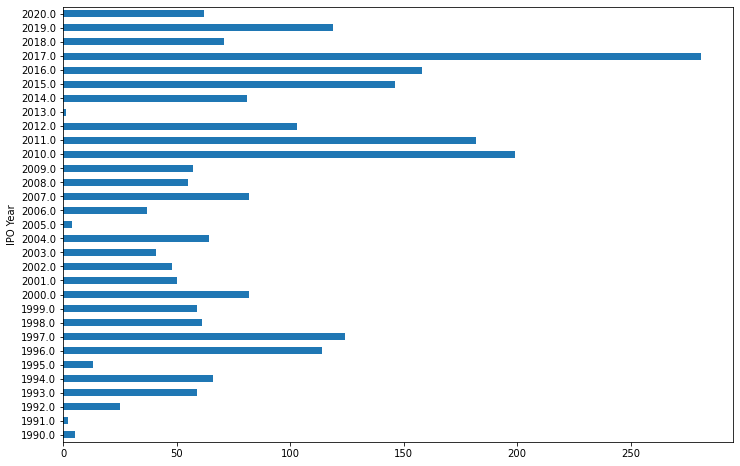

In [143]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
d = data1.groupby(['IPO Year']).size()
p = d.plot(kind='barh')

### 2.3 The number of fraud and non-fraud companies

Text(0.5, 0.98, 'the number of companies Fraud and non-fraud companies')

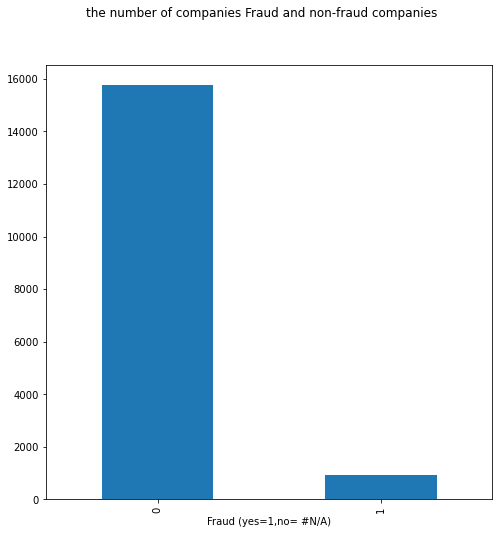

In [144]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 8.0)

d = all_year_fix.groupby(['Fraud (yes=1,no= #N/A)']).size()
p = d.plot(kind='bar')
plt.suptitle('the number of companies Fraud and non-fraud companies')

### 2.4 Number of companies that fraud and non-fraud by year

Text(0.5, 0.98, 'Number of companies that Fraud and non-fraud by year')

<Figure size 576x576 with 0 Axes>

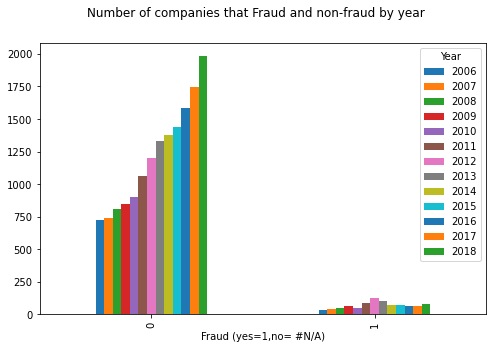

In [145]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 5.0)

d = all_year_fix.groupby(['Fraud (yes=1,no= #N/A)', 'Year']).size()
p = d.unstack(level=1).plot(kind='bar')

plt.suptitle('Number of companies that Fraud and non-fraud by year')

### 2.5 Number of companies that Fraud and non-fraud by industry

Text(0.5, 0.98, 'Number of companies that Fraud and non-fraud by industry')

<Figure size 576x360 with 0 Axes>

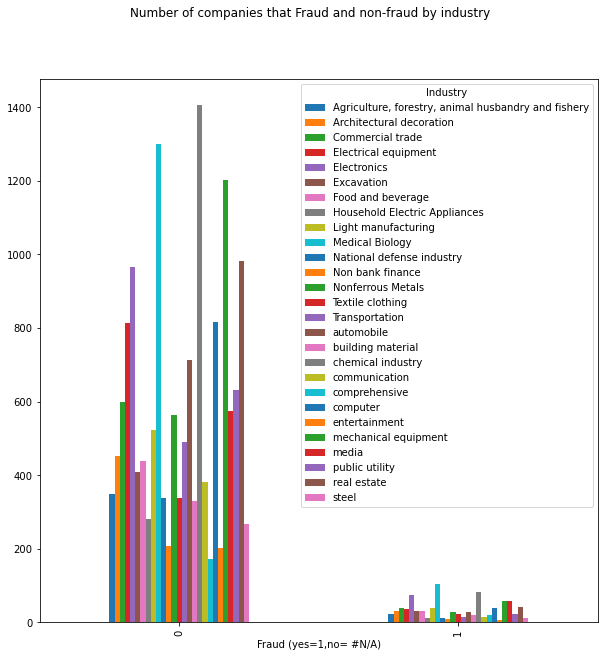

In [146]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (10.0, 10.0)

d = all_year_fix.groupby(['Fraud (yes=1,no= #N/A)', 'Industry']).size()
p = d.unstack(level=1).plot(kind='bar')

plt.suptitle('Number of companies that Fraud and non-fraud by industry')

### 2.6 Mean of each indicator

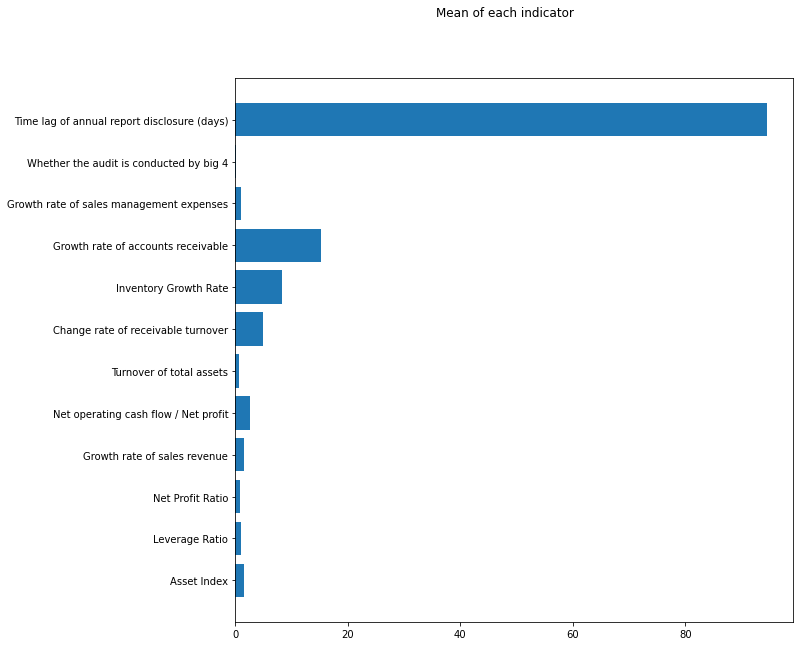

In [147]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (8.0, 5.0)
index = ['Asset Index', 'Leverage Ratio', 'Net Profit Ratio', 'Growth rate of sales revenue', 
         'Net operating cash flow / Net profit', 'Turnover of total assets', 
         'Change rate of receivable turnover', 'Inventory Growth Rate', 'Growth rate of accounts receivable',
         'Growth rate of sales management expenses', 'Whether the audit is conducted by big 4','Time lag of annual report disclosure (days)']

all_mean = []
all_mean.append(all_year_fix['Asset Index'].mean())
all_mean.append(all_year_fix['Leverage Ratio'].mean())
all_mean.append(all_year_fix['Net Profit Ratio'].mean())
all_mean.append(all_year_fix['Growth rate of sales revenue'].mean())
all_mean.append(all_year_fix['Net operating cash flow / Net profit'].mean())
all_mean.append(all_year_fix['Turnover of total assets'].mean())
all_mean.append(all_year_fix['Change rate of receivable turnover'].mean())
all_mean.append(all_year_fix['Inventory Growth Rate'].mean())
all_mean.append(all_year_fix['Growth rate of accounts receivable'].mean())
all_mean.append(all_year_fix['Growth rate of sales management expenses'].mean())
all_mean.append(all_year_fix['Whether the audit is conducted by big 4'].mean())
all_mean.append(all_year_fix['Time lag of annual report disclosure (days)'].mean())

all_mean = all_mean
plt.barh(index, all_mean)
plt.suptitle('Mean of each indicator')

plt.show()

# 3. Train set, valid set & test set 


## 3.1 Train set

In [148]:
# Merge columns from 2011 to 2015 for train set
asset_index1115 = data.columns[9:14]
leverage_ratio1115 = data.columns[22:27]
net_profit_ratio1115 = data.columns[35:40]
sales_revenue1115 = data.columns[48:53]
net_profit1115 = data.columns[61:66]
turnover_of_total_assets1115 = data.columns[74:79]
receivable_turnover1115 = data.columns[87:92]
inventory1115 = data.columns[100:105]
accounts_receivable1115 = data.columns[113:118]
sales_management_expenses1115 = data.columns[126:131]
audit_by_big41115 = data.columns[139:144]
time_lag_of_annual_report_disclosure1115 = data.columns[152:157]

In [149]:
list1 = range(9,165,13)
list2 = range(14,170,13)
dic1 = {}
names = ['asset_index1115', 'leverage_ratio1115', 'net_profit_ratio1115', 'sales_revenue1115', 'net_profit1115', 
         'turnover_of_total_assets1115', 'receivable_turnover1115', 'inventory1115', 'accounts_receivable1115', 
         'sales_management_expenses1115', 'audit_by_big41115', 'time_lag_of_annual_report_disclosure1115']
for i,j,name in zip(list1,list2,names):
    dic[name] = (data.iloc[:,i:j])

In [150]:
# Asset Index from 2011 to 2015
df = data.iloc[:,9:14]
df

,"('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)"
601339.SH,1.040385,1.641820,1.284550,0.757760,1.309137
600215.SH,11.518963,0.814912,0.913159,1.038605,0.888098
002361.SZ,3.884774,0.819997,0.772883,0.532038,2.656348
600391.SH,2.965874,1.388578,0.743022,0.822646,0.798498
002481.SZ,2.434388,0.298381,1.654475,1.318461,1.160554
...,...,...,...,...,...
300147.SZ,3.290737,1.279873,1.406734,1.016825,0.728240
600710.SH,0.724354,1.024618,1.038039,0.866101,0.765056
000058.SZ,0.816262,1.112279,0.920754,0.950338,1.116381
002513.SZ,4.405261,0.409184,0.926132,1.019150,2.616745


In [151]:
# Combine all data from 2011 to 2015
# define X_train

for i,j in zip(range(22,165,13),range(27,170,13)):
    df1 = data.iloc[:,i:j]
    df = pd.concat([df, df1], axis=1)

X_train = df
X_train

,"('Asset Index from year 2006 to 2018', 2011)","('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2011)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)",...,"('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2011)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2012)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2013)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2014)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2011)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)"
601339.SH,1.040385,1.641820,1.284550,0.757760,1.309137,0.838541,0.721819,0.906738,1.194106,1.098268,...,0.0,0.0,0.0,0.0,0.0,143.0,109.0,107.0,103.0,89.0
600215.SH,11.518963,0.814912,0.913159,1.038605,0.888098,1.145542,1.190272,1.066835,0.821771,0.997826,...,0.0,0.0,0.0,0.0,0.0,117.0,114.0,115.0,118.0,119.0
002361.SZ,3.884774,0.819997,0.772883,0.532038,2.656348,1.037345,1.465944,1.124653,0.720156,0.752485,...,0.0,0.0,0.0,0.0,0.0,75.0,59.0,59.0,77.0,112.0
600391.SH,2.965874,1.388578,0.743022,0.822646,0.798498,0.657343,1.080709,1.158966,1.046137,1.080589,...,0.0,0.0,0.0,0.0,0.0,102.0,80.0,81.0,90.0,89.0
002481.SZ,2.434388,0.298381,1.654475,1.318461,1.160554,2.439993,1.174852,1.130920,0.850388,1.056201,...,0.0,0.0,0.0,0.0,0.0,81.0,114.0,107.0,119.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,3.290737,1.279873,1.406734,1.016825,0.728240,1.014021,1.832378,1.060361,0.942216,0.496845,...,0.0,0.0,0.0,0.0,0.0,66.0,81.0,88.0,112.0,86.0
600710.SH,0.724354,1.024618,1.038039,0.866101,0.765056,0.693681,0.938397,1.026656,1.019724,1.100050,...,0.0,0.0,0.0,0.0,0.0,60.0,33.0,109.0,115.0,90.0
000058.SZ,0.816262,1.112279,0.920754,0.950338,1.116381,1.051353,1.008240,1.547650,1.336824,0.816264,...,0.0,0.0,0.0,0.0,0.0,87.0,89.0,79.0,87.0,90.0
002513.SZ,4.405261,0.409184,0.926132,1.019150,2.616745,1.001883,1.411523,1.098248,1.033762,0.720168,...,0.0,0.0,0.0,0.0,0.0,87.0,85.0,84.0,104.0,117.0


In [152]:
# Change the colunmn names of each columns
def change_columns(name):
    name.columns = [ 'Asset Index1', 'Asset Index2', 'Asset Index3','Asset Index4', 'Asset Index5',
                    'Leverage Ratio1', 'Leverage Ratio2', 'Leverage Ratio3', 'Leverage Ratio4', 'Leverage Ratio5', 
                    'Net Profit Ratio1', 'Net Profit Ratio2', 'Net Profit Ratio3', 'Net Profit Ratio4', 'Net Profit Ratio5', 
                    'sales revenue1', 'sales revenue2', 'sales revenue3', 'sales revenue4', 'sales revenue5',
                    'cash flow1', 'cash flow2', 'cash flow3', 'cash flow4', 'cash flow5',
                    'total assets1', 'total assets2', 'total assets3', 'total assets4', 'total assets5',
                    'receivable turnover1', 'receivable turnover2', 'receivable turnover3', 'receivable turnover4', 'receivable turnover5',
                    'Inventory Growth Rate1', 'Inventory Growth Rate2', 'Inventory Growth Rate3', 'Inventory Growth Rate4', 'Inventory Growth Rate5',
                    'accounts receivable1', 'accounts receivable2', 'accounts receivable3', 'accounts receivable4', 'accounts receivable5',
                    'sales management expenses1', 'sales management expenses2', 'sales management expenses3', 'sales management expenses4', 'sales management expenses5',
                    'big 41', 'big 42', 'big 43', 'big 44', 'big 45', 
                    'Time lag1', 'Time lag2', 'Time lag3', 'Time lag4', 'Time lag5'] 


In [153]:
change_columns(X_train)

In [154]:
X_train

,Asset Index1,Asset Index2,Asset Index3,Asset Index4,Asset Index5,Leverage Ratio1,Leverage Ratio2,Leverage Ratio3,Leverage Ratio4,Leverage Ratio5,...,big 41,big 42,big 43,big 44,big 45,Time lag1,Time lag2,Time lag3,Time lag4,Time lag5
601339.SH,1.040385,1.641820,1.284550,0.757760,1.309137,0.838541,0.721819,0.906738,1.194106,1.098268,...,0.0,0.0,0.0,0.0,0.0,143.0,109.0,107.0,103.0,89.0
600215.SH,11.518963,0.814912,0.913159,1.038605,0.888098,1.145542,1.190272,1.066835,0.821771,0.997826,...,0.0,0.0,0.0,0.0,0.0,117.0,114.0,115.0,118.0,119.0
002361.SZ,3.884774,0.819997,0.772883,0.532038,2.656348,1.037345,1.465944,1.124653,0.720156,0.752485,...,0.0,0.0,0.0,0.0,0.0,75.0,59.0,59.0,77.0,112.0
600391.SH,2.965874,1.388578,0.743022,0.822646,0.798498,0.657343,1.080709,1.158966,1.046137,1.080589,...,0.0,0.0,0.0,0.0,0.0,102.0,80.0,81.0,90.0,89.0
002481.SZ,2.434388,0.298381,1.654475,1.318461,1.160554,2.439993,1.174852,1.130920,0.850388,1.056201,...,0.0,0.0,0.0,0.0,0.0,81.0,114.0,107.0,119.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,3.290737,1.279873,1.406734,1.016825,0.728240,1.014021,1.832378,1.060361,0.942216,0.496845,...,0.0,0.0,0.0,0.0,0.0,66.0,81.0,88.0,112.0,86.0
600710.SH,0.724354,1.024618,1.038039,0.866101,0.765056,0.693681,0.938397,1.026656,1.019724,1.100050,...,0.0,0.0,0.0,0.0,0.0,60.0,33.0,109.0,115.0,90.0
000058.SZ,0.816262,1.112279,0.920754,0.950338,1.116381,1.051353,1.008240,1.547650,1.336824,0.816264,...,0.0,0.0,0.0,0.0,0.0,87.0,89.0,79.0,87.0,90.0
002513.SZ,4.405261,0.409184,0.926132,1.019150,2.616745,1.001883,1.411523,1.098248,1.033762,0.720168,...,0.0,0.0,0.0,0.0,0.0,87.0,85.0,84.0,104.0,117.0


In [155]:
# define y_train
y_train = data['status_2016']

## 3.2 Valid set

In [156]:
# Merge columns from 2012 to 2016 for valid set
asset_index1216 = data.columns[10:15]
leverage_ratio1216 = data.columns[23:28]
net_profit_ratio1216 = data.columns[36:41]
sales_revenue1216 = data.columns[49:54]
net_profit1216 = data.columns[62:67]
turnover_of_total_assets1216 = data.columns[75:80]
receivable_turnover1216 = data.columns[88:93]
inventory1216 = data.columns[101:106]
accounts_receivable1216 = data.columns[114:119]
sales_management_expenses1216 = data.columns[127:132]
audit_by_big41216 = data.columns[140:145]
time_lag_of_annual_report_disclosure1216 = data.columns[153:158]

In [157]:
# Asset Index from 2012 to 2016
df2 = data.iloc[:,10:15]

# Combine all data from 2012 to 2016
# define X_valid

for i,j in zip(range(23,166,13),range(28,171,13)):
    df3 = data.iloc[:,i:j]
    df2 = pd.concat([df2, df3], axis=1)

X_valid = df2
X_valid

,"('Asset Index from year 2006 to 2018', 2012)","('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2012)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)",...,"('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2012)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2013)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2014)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2015)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2012)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)"
601339.SH,1.641820,1.284550,0.757760,1.309137,1.136733,0.721819,0.906738,1.194106,1.098268,0.931996,...,0.0,0.0,0.0,0.0,0.0,109.0,107.0,103.0,89.0,116.0
600215.SH,0.814912,0.913159,1.038605,0.888098,1.038030,1.190272,1.066835,0.821771,0.997826,0.718227,...,0.0,0.0,0.0,0.0,0.0,114.0,115.0,118.0,119.0,118.0
002361.SZ,0.819997,0.772883,0.532038,2.656348,0.998762,1.465944,1.124653,0.720156,0.752485,1.086179,...,0.0,0.0,0.0,0.0,0.0,59.0,59.0,77.0,112.0,116.0
600391.SH,1.388578,0.743022,0.822646,0.798498,1.138017,1.080709,1.158966,1.046137,1.080589,1.062225,...,0.0,0.0,0.0,0.0,0.0,80.0,81.0,90.0,89.0,91.0
002481.SZ,0.298381,1.654475,1.318461,1.160554,1.198850,1.174852,1.130920,0.850388,1.056201,1.068405,...,0.0,0.0,0.0,0.0,0.0,114.0,107.0,119.0,107.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.279873,1.406734,1.016825,0.728240,1.912969,1.832378,1.060361,0.942216,0.496845,2.266254,...,0.0,0.0,0.0,0.0,0.0,81.0,88.0,112.0,86.0,84.0
600710.SH,1.024618,1.038039,0.866101,0.765056,0.316616,0.938397,1.026656,1.019724,1.100050,2.222952,...,0.0,0.0,0.0,0.0,0.0,33.0,109.0,115.0,90.0,110.0
000058.SZ,1.112279,0.920754,0.950338,1.116381,1.058862,1.008240,1.547650,1.336824,0.816264,0.867310,...,0.0,0.0,0.0,0.0,0.0,89.0,79.0,87.0,90.0,108.0
002513.SZ,0.409184,0.926132,1.019150,2.616745,1.016607,1.411523,1.098248,1.033762,0.720168,0.942443,...,0.0,0.0,0.0,0.0,0.0,85.0,84.0,104.0,117.0,80.0


In [158]:
change_columns(X_valid)

In [159]:
y_valid = data['status_2017']

## 3.3 Test set

In [160]:
# Merge columns from 2013 to 2017 for test set
asset_index1317 = data.columns[11:16]
leverage_ratio1317 = data.columns[24:29]
net_profit_ratio1317 = data.columns[37:42]
sales_revenue1317 = data.columns[50:55]
net_profit1317 = data.columns[63:68]
turnover_of_total_assets1317 = data.columns[76:81]
receivable_turnover1317 = data.columns[89:94]
inventory1317 = data.columns[102:107]
accounts_receivable1317 = data.columns[115:120]
sales_management_expenses1317 = data.columns[128:133]
audit_by_big41317 = data.columns[141:146]
time_lag_of_annual_report_disclosure1317 = data.columns[154:159]


In [161]:
# Asset Index from 2013 to 2017
df4 = data.iloc[:,11:16]

# Combine all data from 2013 to 2017
# define X_valid

for i,j in zip(range(24,167,13),range(29,172,13)):
    df5 = data.iloc[:,i:j]
    df4 = pd.concat([df4, df5], axis=1)

X_test = df4
X_test

,"('Asset Index from year 2006 to 2018', 2013)","('Asset Index from year 2006 to 2018', 2014)","('Asset Index from year 2006 to 2018', 2015)","('Asset Index from year 2006 to 2018', 2016)","('Asset Index from year 2006 to 2018', 2017)","('Leverage Ratio from year 2006 to 2018', 2013)","('Leverage Ratio from year 2006 to 2018', 2014)","('Leverage Ratio from year 2006 to 2018', 2015)","('Leverage Ratio from year 2006 to 2018', 2016)","('Leverage Ratio from year 2006 to 2018', 2017)",...,"('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2013)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2014)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2015)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2016)","('Whether the audit is conducted by big 4 from year 2006 to 2018 (yes=1, no=0)', 2017)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2013)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2014)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2015)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2016)","('Time lag of annual report disclosure (days) from year 2006 to 2018', 2017)"
601339.SH,1.284550,0.757760,1.309137,1.136733,1.447287,0.906738,1.194106,1.098268,0.931996,1.026464,...,0.0,0.0,0.0,0.0,0.0,107.0,103.0,89.0,116.0,115.0
600215.SH,0.913159,1.038605,0.888098,1.038030,0.995844,1.066835,0.821771,0.997826,0.718227,0.814933,...,0.0,0.0,0.0,0.0,0.0,115.0,118.0,119.0,118.0,117.0
002361.SZ,0.772883,0.532038,2.656348,0.998762,1.206313,1.124653,0.720156,0.752485,1.086179,1.329401,...,0.0,0.0,0.0,0.0,0.0,59.0,77.0,112.0,116.0,101.0
600391.SH,0.743022,0.822646,0.798498,1.138017,0.655604,1.158966,1.046137,1.080589,1.062225,0.996503,...,0.0,0.0,0.0,0.0,0.0,81.0,90.0,89.0,91.0,93.0
002481.SZ,1.654475,1.318461,1.160554,1.198850,1.529838,1.130920,0.850388,1.056201,1.068405,0.973010,...,0.0,0.0,0.0,0.0,0.0,107.0,119.0,107.0,117.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.406734,1.016825,0.728240,1.912969,0.706049,1.060361,0.942216,0.496845,2.266254,1.075924,...,0.0,0.0,0.0,0.0,0.0,88.0,112.0,86.0,84.0,90.0
600710.SH,1.038039,0.866101,0.765056,0.316616,1.067932,1.026656,1.019724,1.100050,2.222952,1.007420,...,0.0,0.0,0.0,0.0,0.0,109.0,115.0,90.0,110.0,79.0
000058.SZ,0.920754,0.950338,1.116381,1.058862,0.485008,1.547650,1.336824,0.816264,0.867310,2.035690,...,0.0,0.0,0.0,0.0,0.0,79.0,87.0,90.0,108.0,114.0
002513.SZ,0.926132,1.019150,2.616745,1.016607,0.956873,1.098248,1.033762,0.720168,0.942443,0.978273,...,0.0,0.0,0.0,0.0,0.0,84.0,104.0,117.0,80.0,118.0


In [162]:
change_columns(X_test)

In [163]:
X_test

,Asset Index1,Asset Index2,Asset Index3,Asset Index4,Asset Index5,Leverage Ratio1,Leverage Ratio2,Leverage Ratio3,Leverage Ratio4,Leverage Ratio5,...,big 41,big 42,big 43,big 44,big 45,Time lag1,Time lag2,Time lag3,Time lag4,Time lag5
601339.SH,1.284550,0.757760,1.309137,1.136733,1.447287,0.906738,1.194106,1.098268,0.931996,1.026464,...,0.0,0.0,0.0,0.0,0.0,107.0,103.0,89.0,116.0,115.0
600215.SH,0.913159,1.038605,0.888098,1.038030,0.995844,1.066835,0.821771,0.997826,0.718227,0.814933,...,0.0,0.0,0.0,0.0,0.0,115.0,118.0,119.0,118.0,117.0
002361.SZ,0.772883,0.532038,2.656348,0.998762,1.206313,1.124653,0.720156,0.752485,1.086179,1.329401,...,0.0,0.0,0.0,0.0,0.0,59.0,77.0,112.0,116.0,101.0
600391.SH,0.743022,0.822646,0.798498,1.138017,0.655604,1.158966,1.046137,1.080589,1.062225,0.996503,...,0.0,0.0,0.0,0.0,0.0,81.0,90.0,89.0,91.0,93.0
002481.SZ,1.654475,1.318461,1.160554,1.198850,1.529838,1.130920,0.850388,1.056201,1.068405,0.973010,...,0.0,0.0,0.0,0.0,0.0,107.0,119.0,107.0,117.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.406734,1.016825,0.728240,1.912969,0.706049,1.060361,0.942216,0.496845,2.266254,1.075924,...,0.0,0.0,0.0,0.0,0.0,88.0,112.0,86.0,84.0,90.0
600710.SH,1.038039,0.866101,0.765056,0.316616,1.067932,1.026656,1.019724,1.100050,2.222952,1.007420,...,0.0,0.0,0.0,0.0,0.0,109.0,115.0,90.0,110.0,79.0
000058.SZ,0.920754,0.950338,1.116381,1.058862,0.485008,1.547650,1.336824,0.816264,0.867310,2.035690,...,0.0,0.0,0.0,0.0,0.0,79.0,87.0,90.0,108.0,114.0
002513.SZ,0.926132,1.019150,2.616745,1.016607,0.956873,1.098248,1.033762,0.720168,0.942443,0.978273,...,0.0,0.0,0.0,0.0,0.0,84.0,104.0,117.0,80.0,118.0


In [164]:
y_test = data['status_2018']

In [165]:
index1 = X_train.index
index2 = X_valid.index
index3 = X_test.index

## 3.4 Imputation

### 3.4.1 SimpleImputer

In [166]:
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train, index=index1)
change_columns(X_train)

X_valid = imputer.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid, index=index2)
change_columns(X_valid)

X_test = imputer.fit_transform(X_test)
X_test = pd.DataFrame(X_test, index=index3)
change_columns(X_test)

### 3.4.2 KNNImputer

In [60]:
imputer_knn = KNNImputer(n_neighbors=3, weights="uniform")
X_train_knn = imputer_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, index=index1)
change_columns(X_train_knn)

X_valid_knn = imputer_knn.fit_transform(X_valid_knn)
X_valid_knn = pd.DataFrame(X_valid_knn, index=index2)
change_columns(X_valid_knn)

X_test_knn = imputer_knn.fit_transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, index=index3)
change_columns(X_test_knn)

In [167]:
X_valid = imputer.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid, index=index2)
change_columns(X_valid)

In [168]:
X_test = imputer.fit_transform(X_test)
X_test = pd.DataFrame(X_test, index=index3)
change_columns(X_test)

<AxesSubplot:>

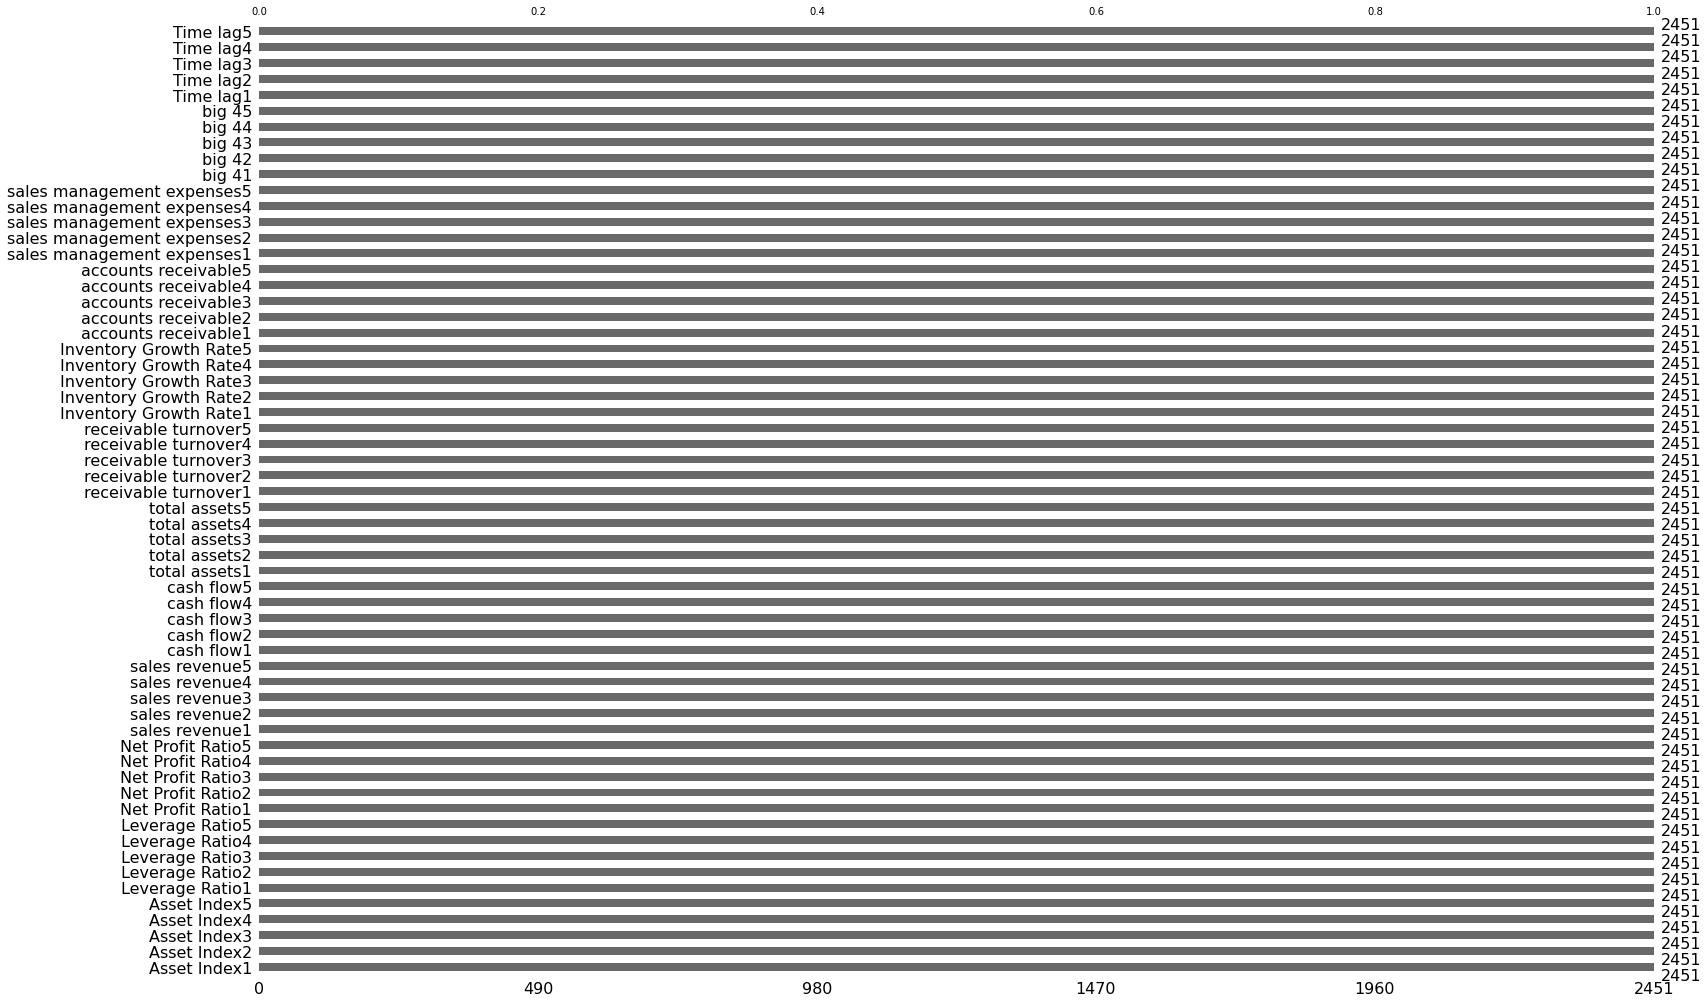

In [169]:
# check missing values for X_train, X_valid, X_test
msno.bar(X_train)

<AxesSubplot:>

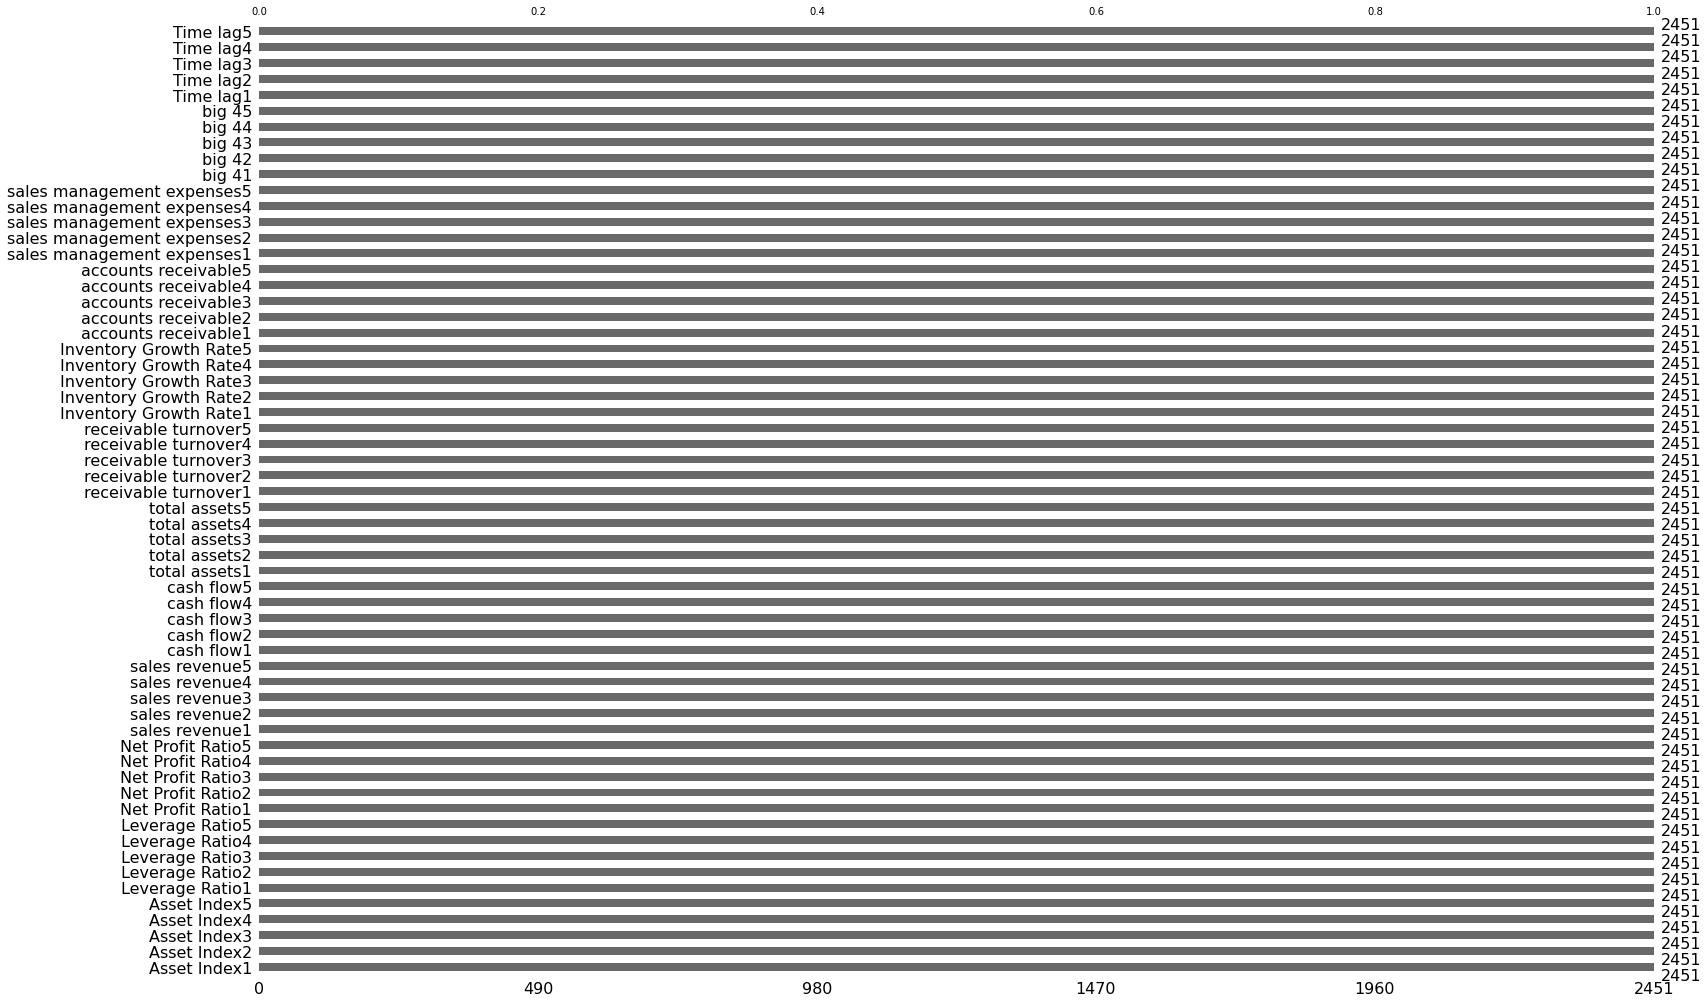

In [170]:
# check missing values for X_valid
msno.bar(X_valid)

<AxesSubplot:>

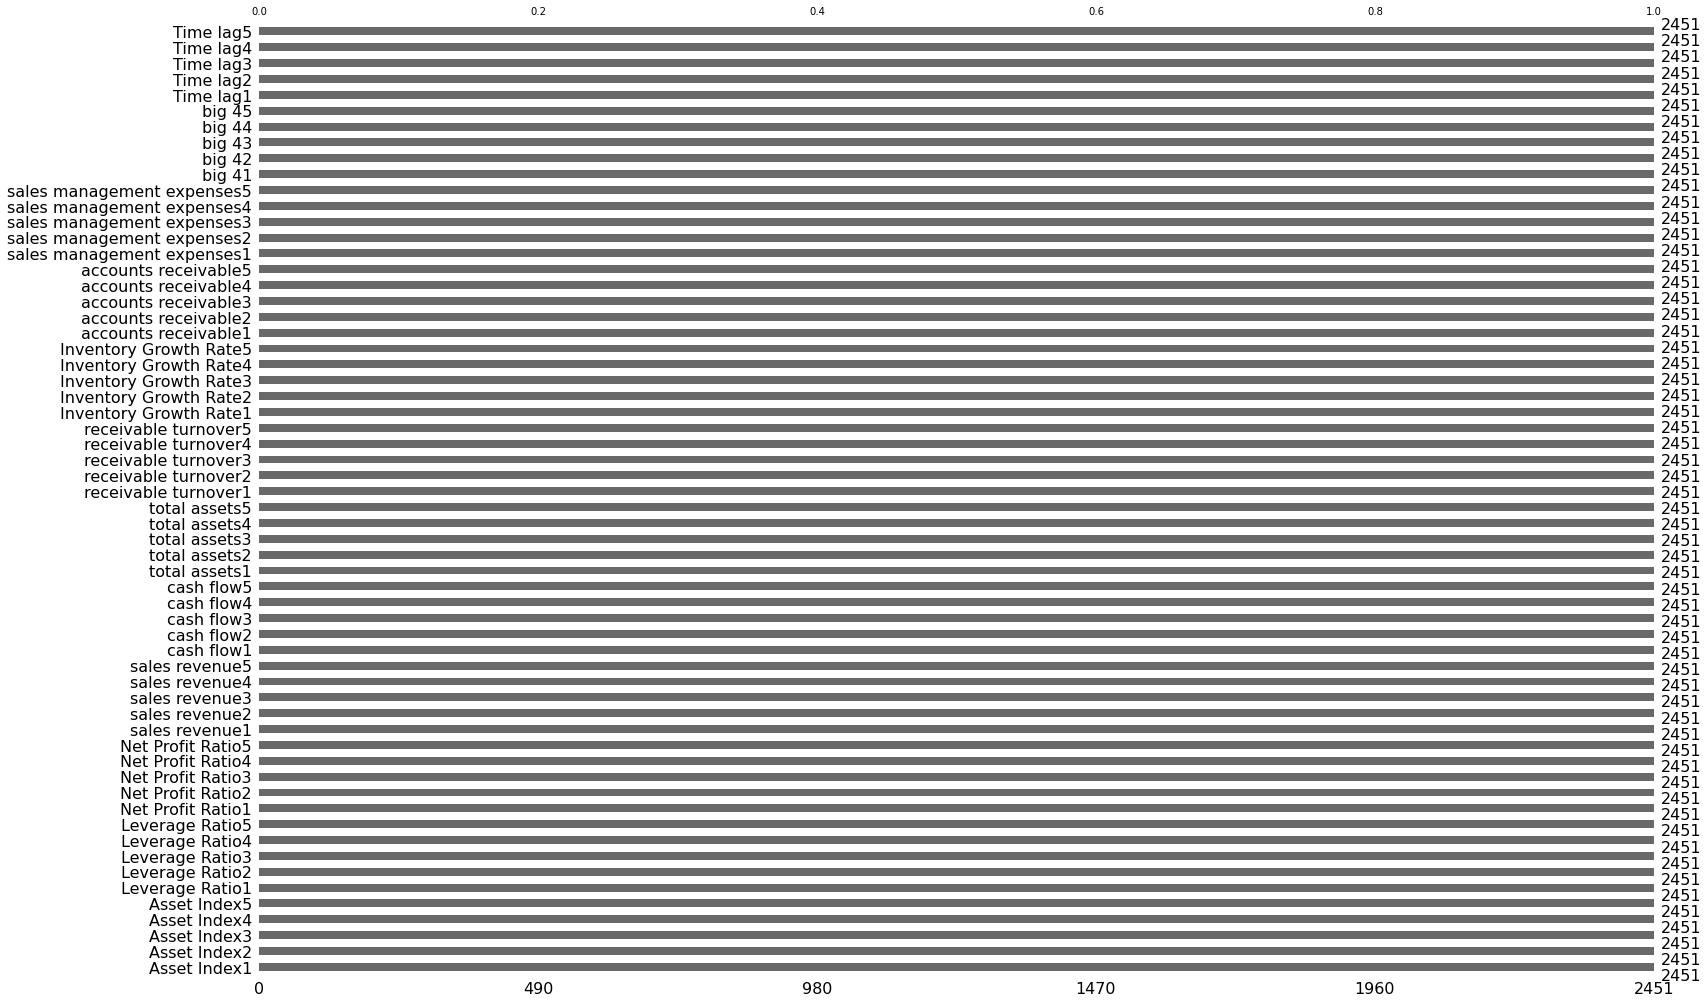

In [171]:
# check missing values for X_test
msno.bar(X_test)

## 3.5 One-Hot Encoding

### 3.5.1 One-Hot Encoding for X_train

In [172]:
# One-Hot Encoding for Industry
ohe_industry = pd.get_dummies(data['Industry'])
ohe_industry

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,chemical industry,communication,comprehensive,computer,entertainment,mechanical equipment,media,public utility,real estate,steel
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [173]:
# merge X_train and ohe_industry
X_train = pd.merge(ohe_industry, X_train, left_index=True, right_index=True)
X_train

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,big 41,big 42,big 43,big 44,big 45,Time lag1,Time lag2,Time lag3,Time lag4,Time lag5
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,143.0,109.0,107.0,103.0,89.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,117.0,114.0,115.0,118.0,119.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,75.0,59.0,59.0,77.0,112.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,102.0,80.0,81.0,90.0,89.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,81.0,114.0,107.0,119.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,66.0,81.0,88.0,112.0,86.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,60.0,33.0,109.0,115.0,90.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,87.0,89.0,79.0,87.0,90.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,87.0,85.0,84.0,104.0,117.0


In [174]:
# One-Hot Encoding for big4
from sklearn.preprocessing import OneHotEncoder

a = pd.DataFrame()

year = 2011

for i in range(77,82):
    big4_X = X_train.iloc[:,i:i+1].values.reshape(-1,1)
    enc = OneHotEncoder(categories='auto').fit(big4_X)
    enc_result = enc.transform(big4_X).toarray()
    enc_result = pd.DataFrame(enc_result,index=index1)
    enc_result.columns = [str(year)+' not conducted', str(year)+' conducted', str(year)+' unknown']
    
    year+=1
    
    a = pd.concat([a,enc_result],axis = 1)


In [175]:
a.columns = ['1 not conducted', '1 conducted', '1 unknown', '2 not conducted', '2 conducted', '2 unknown', '3 not conducted', '3 conducted',
             '3 unknown', '4 not conducted', '4 conducted', '4 unknown', '5 not conducted', '5 conducted', '5 unknown']
a


,1 not conducted,1 conducted,1 unknown,2 not conducted,2 conducted,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [176]:
X_train = pd.concat([X_train, a],axis = 1)
X_train

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 3.5.2 One-Hot Encoding for X_valid

In [177]:
# merge X_valid and ohe_industry
X_valid = pd.merge(ohe_industry, X_valid, left_index=True, right_index=True)
X_valid

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,big 41,big 42,big 43,big 44,big 45,Time lag1,Time lag2,Time lag3,Time lag4,Time lag5
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,109.0,107.0,103.0,89.0,116.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,114.0,115.0,118.0,119.0,118.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,59.0,59.0,77.0,112.0,116.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,80.0,81.0,90.0,89.0,91.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,114.0,107.0,119.0,107.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,81.0,88.0,112.0,86.0,84.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,33.0,109.0,115.0,90.0,110.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,89.0,79.0,87.0,90.0,108.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,85.0,84.0,104.0,117.0,80.0


In [178]:
# One-Hot Encoding for big4
from sklearn.preprocessing import OneHotEncoder

b = pd.DataFrame()

year = 2012

for i in range(77,82):
    big4_X = X_valid.iloc[:,i:i+1].values.reshape(-1,1)
    enc = OneHotEncoder(categories='auto').fit(big4_X)
    enc_result = enc.transform(big4_X).toarray()
    enc_result = pd.DataFrame(enc_result,index=index2)
    enc_result.columns = [str(year)+' not conducted', str(year)+' conducted', str(year)+' unknown']
    
    year+=1
    
    b = pd.concat([b,enc_result],axis = 1)


In [179]:
b.columns = ['1 not conducted', '1 conducted', '1 unknown', '2 not conducted', '2 conducted', '2 unknown', '3 not conducted', '3 conducted',
             '3 unknown', '4 not conducted', '4 conducted', '4 unknown', '5 not conducted', '5 conducted', '5 unknown']
b


,1 not conducted,1 conducted,1 unknown,2 not conducted,2 conducted,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [180]:
X_valid = pd.concat([X_valid, b],axis = 1)
X_valid

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 3.5.2 One-Hot Encoding for X_test

In [181]:
# merge X_test and ohe_industry
X_test = pd.merge(ohe_industry, X_test, left_index=True, right_index=True)
X_test

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,big 41,big 42,big 43,big 44,big 45,Time lag1,Time lag2,Time lag3,Time lag4,Time lag5
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,107.0,103.0,89.0,116.0,115.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,115.0,118.0,119.0,118.0,117.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,59.0,77.0,112.0,116.0,101.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,81.0,90.0,89.0,91.0,93.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,107.0,119.0,107.0,117.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,88.0,112.0,86.0,84.0,90.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,109.0,115.0,90.0,110.0,79.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,79.0,87.0,90.0,108.0,114.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,84.0,104.0,117.0,80.0,118.0


In [182]:
# One-Hot Encoding for big4
from sklearn.preprocessing import OneHotEncoder

c = pd.DataFrame()

year = 2013

for i in range(77,81):
    big4_X = X_test.iloc[:,i:i+1].values.reshape(-1,1)
    enc = OneHotEncoder(categories='auto').fit(big4_X)
    enc_result = enc.transform(big4_X).toarray()
    enc_result = pd.DataFrame(enc_result,index=index3)
    enc_result.columns = [str(year)+' not conducted', str(year)+' conducted', str(year)+' unknown']
    
    year+=1
    
    c = pd.concat([c,enc_result],axis = 1)

In [183]:
big45 = X_test.iloc[:,81:82].values.reshape(-1,1)
enc = OneHotEncoder(categories='auto').fit(big45)
enc_result = enc.transform(big45).toarray()
enc_result = pd.DataFrame(enc_result,index=index3)
enc_result.insert(2,'2', 0.0)

In [184]:
c = pd.concat([c,enc_result],axis = 1)
c

,2013 not conducted,2013 conducted,2013 unknown,2014 not conducted,2014 conducted,2014 unknown,2015 not conducted,2015 conducted,2015 unknown,2016 not conducted,2016 conducted,2016 unknown,0,1,2
601339.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [185]:
c.columns = ['1 not conducted', '1 conducted', '1 unknown', '2 not conducted', '2 conducted', '2 unknown', '3 not conducted', '3 conducted',
             '3 unknown', '4 not conducted', '4 conducted', '4 unknown', '5 not conducted', '5 conducted', '5 unknown']
c


,1 not conducted,1 conducted,1 unknown,2 not conducted,2 conducted,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [186]:
X_test = pd.concat([X_test, c],axis = 1)
X_test

,"Agriculture, forestry, animal husbandry and fishery",Architectural decoration,Commercial trade,Electrical equipment,Electronics,Excavation,Food and beverage,Household Electric Appliances,Light manufacturing,Medical Biology,...,2 unknown,3 not conducted,3 conducted,3 unknown,4 not conducted,4 conducted,4 unknown,5 not conducted,5 conducted,5 unknown
601339.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600215.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002361.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600391.SH,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002481.SZ,0,0,0,0,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
600710.SH,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
000058.SZ,0,0,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
002513.SZ,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## 3.6 Dealing with unbalanced class

In [187]:
# SMOTE(over sampling)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_enc_res, y_train_res = sm.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(y_train.value_counts().to_dict()))
print("The number of classes after fit {}".format(y_train_res.value_counts().to_dict()))


The number of classes before fit {0: 2379, 1: 72}
The number of classes after fit {1: 2379, 0: 2379}


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

classifier=LogisticRegression()
classifier.fit(X_train_enc_res,y_train_res)
y_pred_valid=classifier.predict(X_valid)
print(confusion_matrix(y_valid,y_pred_valid))
print(accuracy_score(y_valid,y_pred_valid))
print(classification_report(y_valid,y_pred_valid))

[[ 873 1510]
 [  14   54]]
0.37821297429620565
              precision    recall  f1-score   support

           0       0.98      0.37      0.53      2383
           1       0.03      0.79      0.07        68

    accuracy                           0.38      2451
   macro avg       0.51      0.58      0.30      2451
weighted avg       0.96      0.38      0.52      2451



## 3.7 Variable importance & feature selection

### 3.7.1 UnivariateSelect

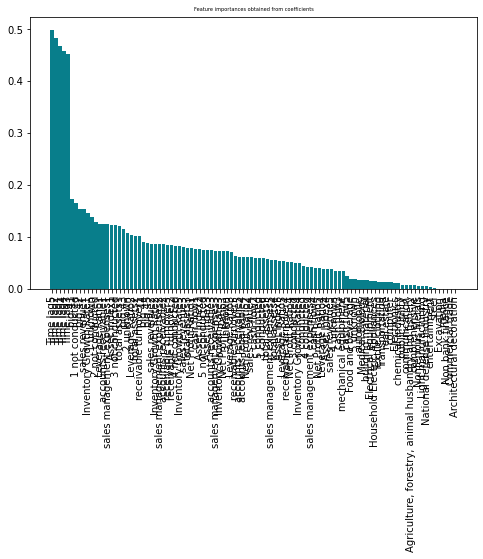

In [189]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif  

model = GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=50)
model.fit(X_train_enc_res,y_train_res)
importances = pd.DataFrame(data={
    'Attribute': X_train_enc_res.columns,
    'Importance': model.scores_
})
importances=importances.sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
us=importances.iloc[0:30,:]
plt.rcParams['figure.figsize'] = (25.0, 20.0)


### 3.7.2 Model based methods of LR

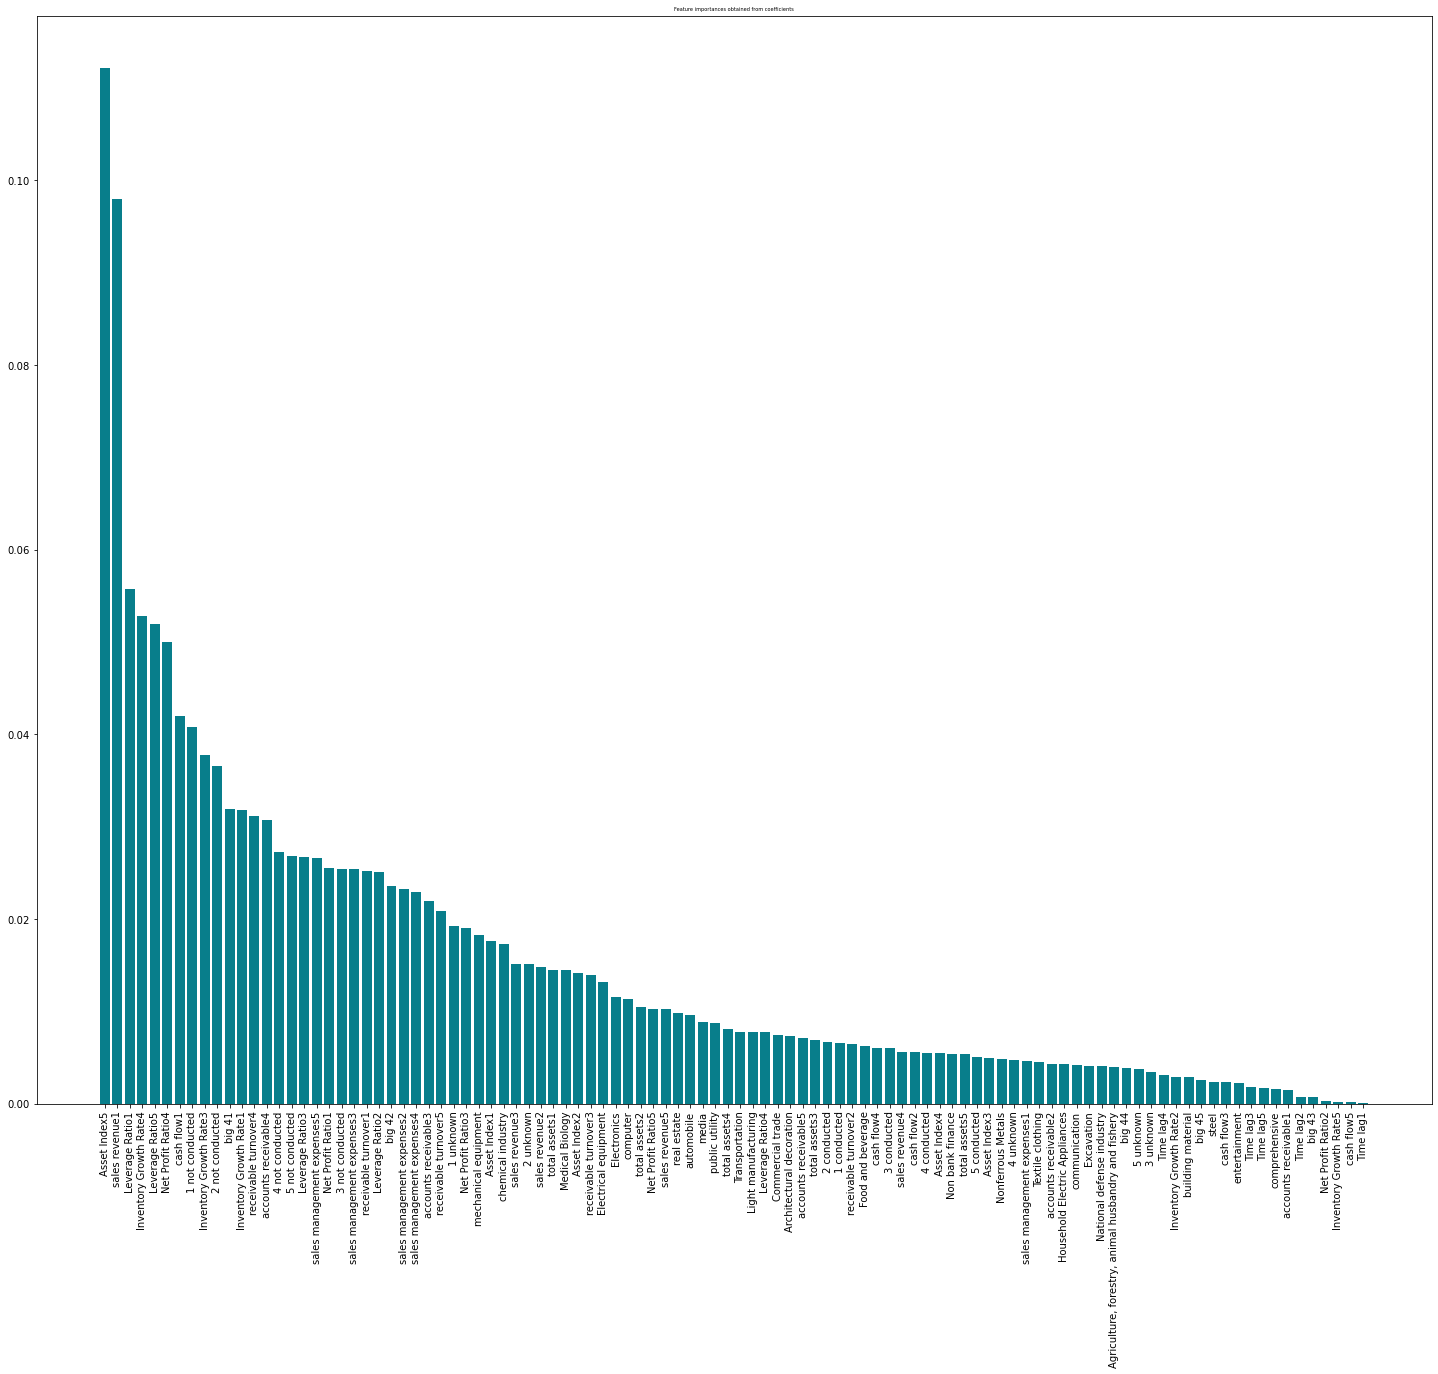

In [190]:
model = LogisticRegression()
model.fit(X_train_enc_res,y_train_res)
importances = pd.DataFrame(data={
    'Attribute': X_train_enc_res.columns,
    'Importance': abs(model.coef_[0])
})
importances=importances.sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
lr=importances.iloc[0:30,:]
plt.rcParams['figure.figsize'] = (20.0, 20.0)


### 3.7.3 RFE

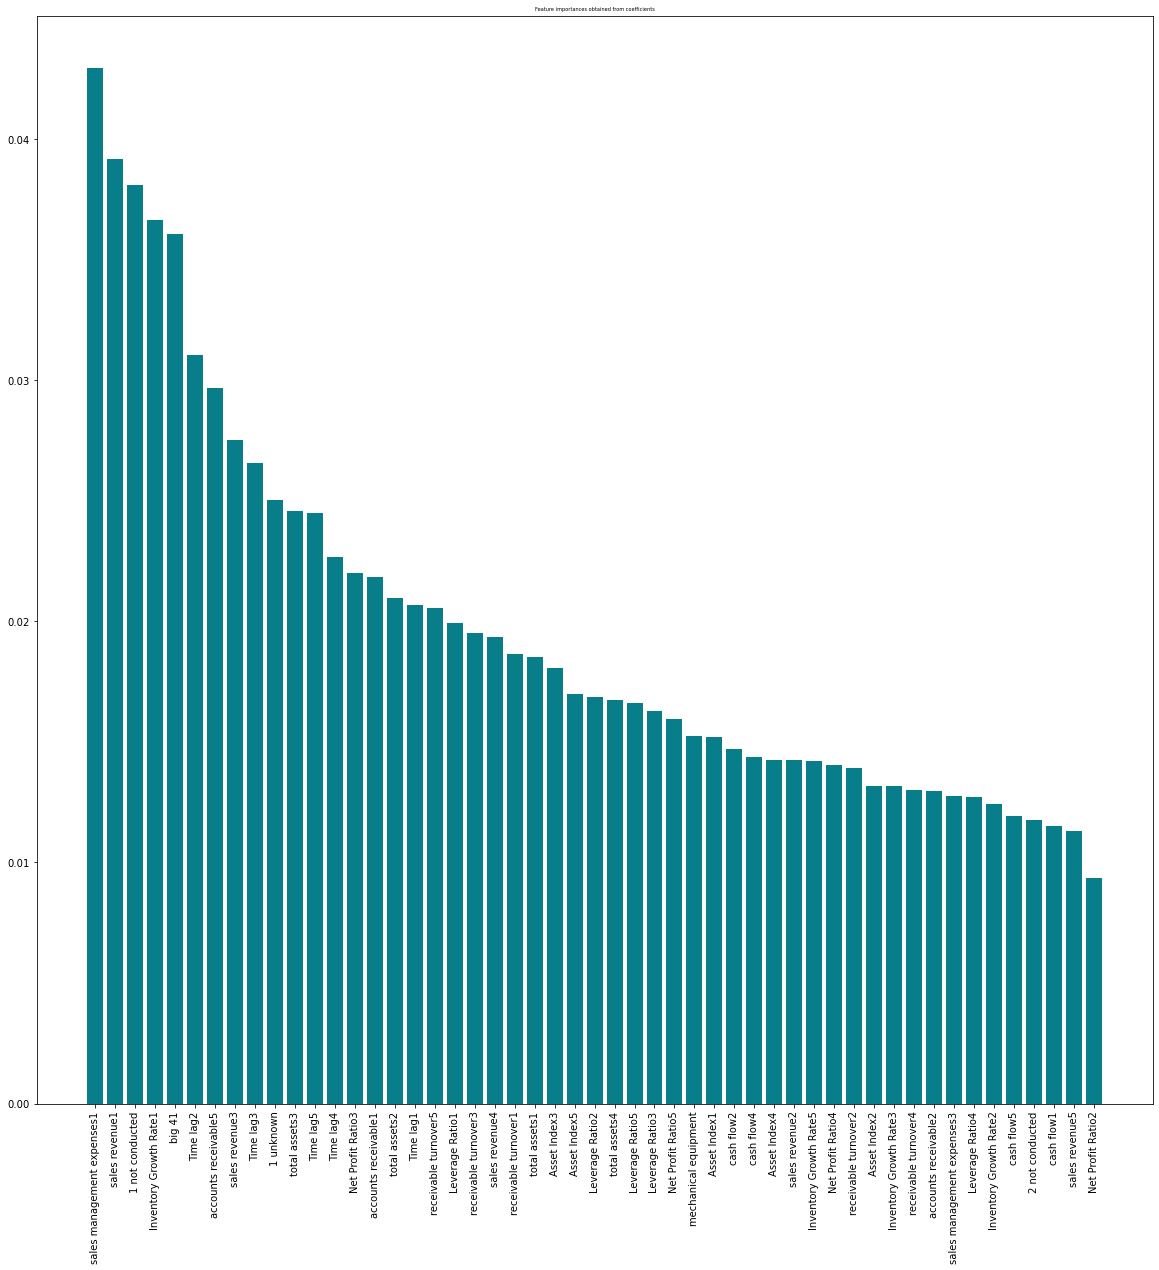

In [191]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model =RFE(RandomForestClassifier())
model.fit(X_train_enc_res,y_train_res)
importances = pd.DataFrame(data={
    'Attribute': X_train_enc_res.columns[model.support_],
    'Importance': model.estimator_.feature_importances_
})
importances=importances.sort_values(by='Importance',ascending=False)


plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
rf_perm=importances.iloc[0:30,:]
plt.rcParams['figure.figsize'] = (15.0, 15.0)


### 3.7.4 Model based methods of LR

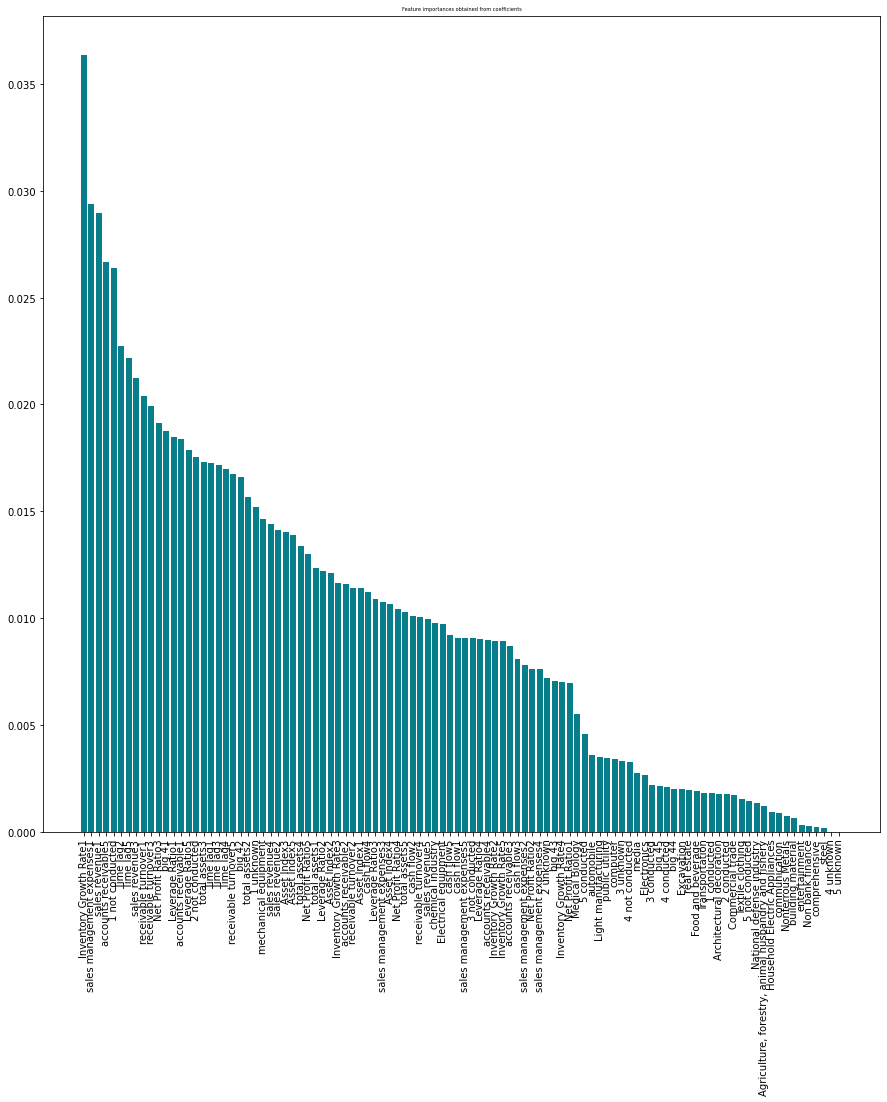

In [192]:
model = RandomForestClassifier()
model.fit(X_train_enc_res,y_train_res)
importances = pd.DataFrame(data={
    'Attribute': X_train_enc_res.columns,
    'Importance': model.feature_importances_
})
importances=importances.sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
rf=importances.iloc[0:30,:]
plt.rcParams['figure.figsize'] = (20.0, 20.0)


### 3.7.5 Final feature selection

In [193]:
all = pd.concat([us,lr,rf_perm,rf],axis=1)
features = all.iloc[:,[0,2,4,6]]
features.columns=['us','lr','rf_perm','rf']

In [194]:
count = []
for column in features.columns:
  for i in features[str(column)]:
    if i ==np.nan:
        continue
    else:
        count.append(i)

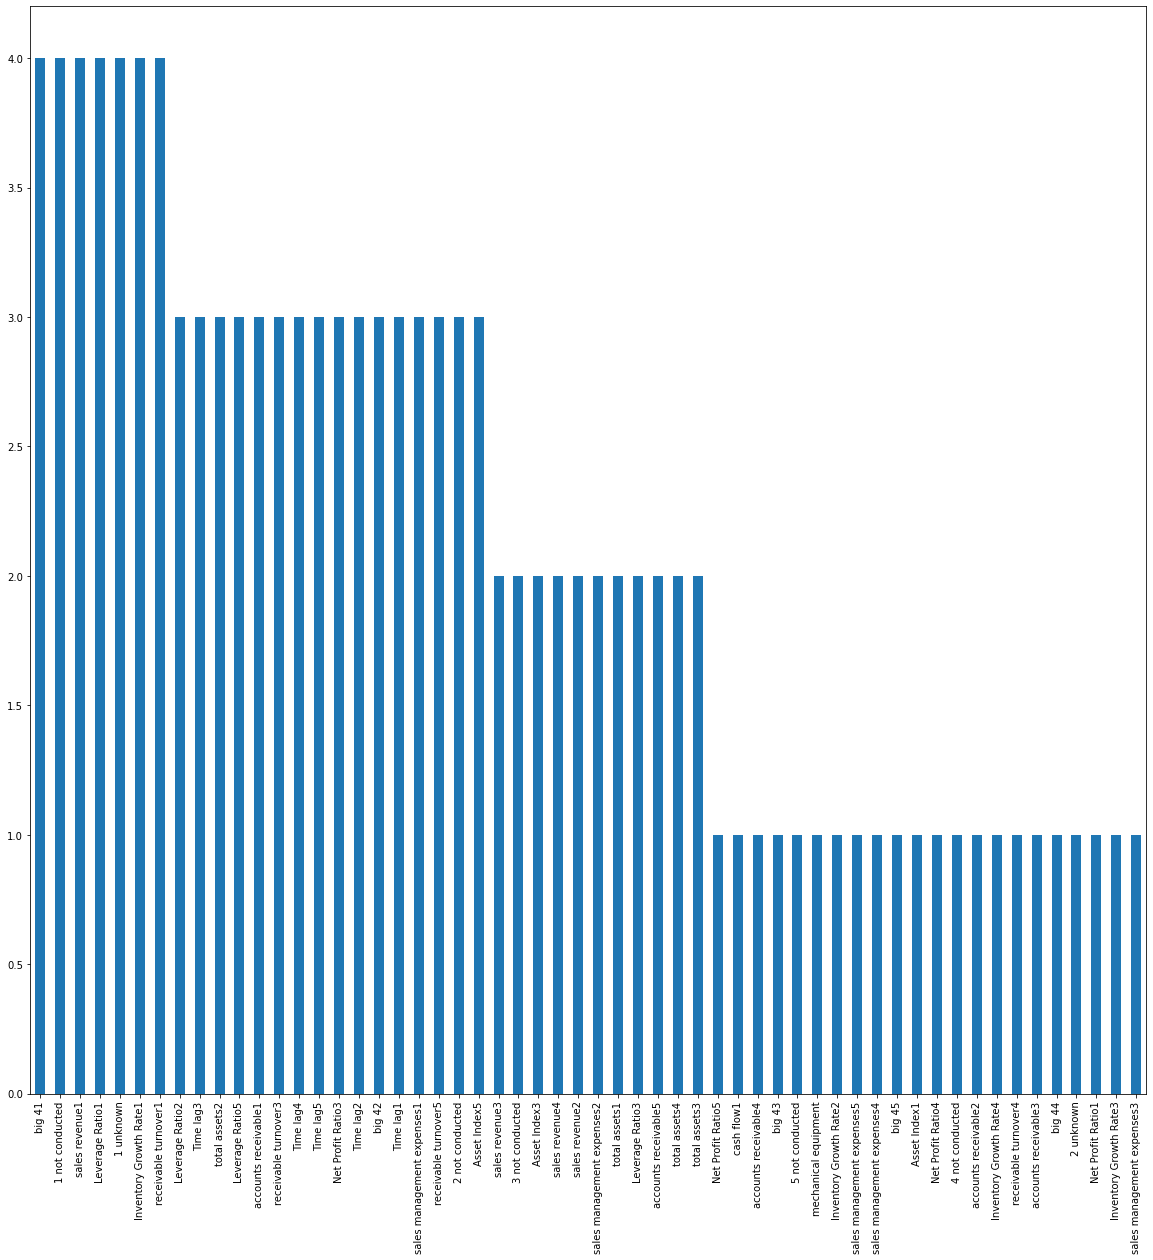

In [195]:
# the total number of times different features have been selected
result = pd.value_counts(count)
result.plot.bar()
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [196]:
select_feature = []
for i,j in zip(result.index, result.values):
    if int(j) >= 2:
        select_feature.append(i)
        

In [197]:
select_feature

['big 41',
 '1 not conducted',
 'sales revenue1',
 'Leverage Ratio1',
 '1 unknown',
 'Inventory Growth Rate1',
 'receivable turnover1',
 'Leverage Ratio2',
 'Time lag3',
 'total assets2',
 'Leverage Ratio5',
 'accounts receivable1',
 'receivable turnover3',
 'Time lag4',
 'Time lag5',
 'Net Profit Ratio3',
 'Time lag2',
 'big 42',
 'Time lag1',
 'sales management expenses1',
 'receivable turnover5',
 '2 not conducted',
 'Asset Index5',
 'sales revenue3',
 '3 not conducted',
 'Asset Index3',
 'sales revenue4',
 'sales revenue2',
 'sales management expenses2',
 'total assets1',
 'Leverage Ratio3',
 'accounts receivable5',
 'total assets4',
 'total assets3']

In [198]:
X_train = X_train_enc_res[select_feature]
X_train

,big 41,1 not conducted,sales revenue1,Leverage Ratio1,1 unknown,Inventory Growth Rate1,receivable turnover1,Leverage Ratio2,Time lag3,total assets2,...,3 not conducted,Asset Index3,sales revenue4,sales revenue2,sales management expenses2,total assets1,Leverage Ratio3,accounts receivable5,total assets4,total assets3
0,0.000000,1.000000,0.976696,0.838541,0.0,1.166870,0.917693,0.721819,107.000000,0.624400,...,1.000000,1.284550,1.081265,1.001886,1.051757,0.770400,0.906738,1.168439,0.484100,0.486500
1,0.000000,1.000000,0.778747,1.145542,0.0,0.607678,2.410052,1.190272,115.000000,0.072200,...,1.000000,0.913159,1.493901,1.114789,1.210601,0.072100,1.066835,1.072850,0.225800,0.144500
2,0.000000,1.000000,1.284400,1.037345,0.0,1.178202,0.971420,1.465944,59.000000,0.915700,...,1.000000,0.772883,1.271852,1.185564,1.264780,0.960700,1.124653,1.303518,0.820600,0.867800
3,0.000000,1.000000,1.407184,0.657343,0.0,1.627468,1.051949,1.080709,81.000000,0.455700,...,1.000000,0.743022,1.081547,0.968235,1.403701,0.641000,1.158966,1.184961,0.452900,0.464500
4,0.000000,1.000000,1.606373,2.439993,0.0,2.107161,0.910634,1.174852,107.000000,0.445000,...,1.000000,1.654475,1.431072,0.981955,1.122932,0.579800,1.130920,2.134923,0.384900,0.466100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,0.163019,0.836981,1.549537,0.986002,0.0,0.820075,0.980485,0.962283,85.673962,0.576086,...,0.836981,3.185237,0.613216,1.067134,0.939759,0.551070,0.911909,1.033264,0.324146,0.505461
4754,0.000000,1.000000,1.233798,1.072507,0.0,1.046654,1.408069,0.589103,110.532374,0.824066,...,1.000000,1.833825,0.920337,0.931486,1.233603,1.408095,1.385934,1.156492,0.519158,0.656180
4755,0.000000,1.000000,1.295722,0.909699,0.0,1.217819,0.880784,0.898932,99.454722,0.825911,...,1.000000,0.796979,1.254844,1.194759,0.892448,0.886284,1.217017,1.559859,0.804655,0.799933
4756,0.834947,0.165053,1.203281,0.945852,0.0,1.460261,1.033604,0.937315,115.669894,0.729970,...,0.165053,1.567884,0.984375,0.968338,1.038303,0.871323,0.880151,1.680543,0.519741,0.567277


In [199]:
X_valid = X_valid[select_feature]
X_valid

,big 41,1 not conducted,sales revenue1,Leverage Ratio1,1 unknown,Inventory Growth Rate1,receivable turnover1,Leverage Ratio2,Time lag3,total assets2,...,3 not conducted,Asset Index3,sales revenue4,sales revenue2,sales management expenses2,total assets1,Leverage Ratio3,accounts receivable5,total assets4,total assets3
601339.SH,0.0,1.0,1.001886,0.721819,0.0,0.675763,1.223720,0.906738,103.0,0.4865,...,1.0,0.757760,1.085573,0.895852,1.193171,0.6244,1.194106,1.265943,0.4709,0.4841
600215.SH,0.0,1.0,1.114789,1.190272,0.0,1.282011,1.424294,1.066835,118.0,0.1445,...,1.0,1.038605,0.376184,2.197308,0.494737,0.0722,0.821771,0.779961,0.0921,0.2258
002361.SZ,0.0,1.0,1.185564,1.465944,0.0,1.968261,1.159148,1.124653,77.0,0.8678,...,1.0,0.532038,0.943264,1.192838,1.076929,0.9157,0.720156,1.164748,0.5647,0.8206
600391.SH,0.0,1.0,0.968235,1.080709,0.0,1.215004,1.359985,1.158966,90.0,0.4645,...,1.0,0.822646,1.033065,1.153860,0.773985,0.4557,1.046137,1.179737,0.4288,0.4529
002481.SZ,0.0,1.0,0.981955,1.174852,0.0,0.626910,1.332674,1.130920,119.0,0.4661,...,1.0,1.318461,1.166921,1.273789,1.113496,0.4450,0.850388,1.110656,0.3122,0.3849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0.0,1.0,1.300167,1.832378,0.0,1.440645,1.460788,1.060361,112.0,0.3926,...,1.0,1.016825,0.961039,1.574386,0.759915,0.3289,0.942216,1.541721,0.3555,0.4315
600710.SH,0.0,1.0,0.640615,0.938397,0.0,0.773793,1.708472,1.026656,115.0,0.3907,...,1.0,0.866101,0.758812,0.840675,1.243098,0.4361,1.019724,10.832682,0.3925,0.4310
000058.SZ,0.0,1.0,1.061723,1.008240,0.0,4.285537,0.975439,1.547650,87.0,0.3083,...,1.0,0.950338,1.088340,1.287944,0.728383,0.2717,1.336824,0.517964,0.2812,0.2842
002513.SZ,0.0,1.0,1.109578,1.411523,0.0,2.249485,1.201197,1.098248,104.0,0.5577,...,1.0,1.019150,0.807002,1.081611,0.959947,0.6213,1.033762,1.049597,0.3041,0.4816


In [200]:
X_test = X_test[select_feature]
X_test

,big 41,1 not conducted,sales revenue1,Leverage Ratio1,1 unknown,Inventory Growth Rate1,receivable turnover1,Leverage Ratio2,Time lag3,total assets2,...,3 not conducted,Asset Index3,sales revenue4,sales revenue2,sales management expenses2,total assets1,Leverage Ratio3,accounts receivable5,total assets4,total assets3
601339.SH,0.0,1.0,0.895852,0.906738,0.0,1.045133,1.161864,1.194106,89.0,0.4841,...,1.0,1.309137,1.090836,1.081265,0.983775,0.4865,1.098268,0.942629,0.4833,0.4709
600215.SH,0.0,1.0,2.197308,1.066835,0.0,1.116188,0.576060,0.821771,119.0,0.2258,...,1.0,0.888098,1.150734,1.493901,0.616984,0.1445,0.997826,0.697099,0.1151,0.0921
002361.SZ,0.0,1.0,1.192838,1.124653,0.0,0.768806,1.044814,0.720156,112.0,0.8206,...,1.0,2.656348,1.198923,1.271852,1.083157,0.8678,0.752485,1.350174,0.5712,0.5647
600391.SH,0.0,1.0,1.153860,1.158966,0.0,1.015311,1.381490,1.046137,89.0,0.4529,...,1.0,0.798498,1.048260,1.081547,1.054508,0.4645,1.080589,0.944385,0.3982,0.4288
002481.SZ,0.0,1.0,1.273789,1.130920,0.0,1.223169,0.817929,0.850388,107.0,0.3849,...,1.0,1.160554,1.484351,1.431072,0.841728,0.4661,1.056201,0.878283,0.4280,0.3122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147.SZ,0.0,1.0,1.574386,1.060361,0.0,1.744727,1.650937,0.942216,86.0,0.4315,...,1.0,0.728240,1.271393,1.208439,1.100049,0.3926,0.496845,1.016402,0.2946,0.3555
600710.SH,0.0,1.0,0.840675,1.026656,0.0,0.819968,1.447822,1.019724,90.0,0.4310,...,1.0,0.765056,56.758765,1.012956,0.966344,0.3907,1.100050,1.210177,2.5781,0.3925
000058.SZ,0.0,1.0,1.287944,1.547650,0.0,36.094461,14.750786,1.336824,90.0,0.2842,...,1.0,1.116381,0.906748,1.140595,0.827730,0.3083,0.816264,1.217485,0.2605,0.2812
002513.SZ,0.0,1.0,1.081611,1.098248,0.0,0.945853,1.246494,1.033762,117.0,0.4816,...,1.0,2.616745,1.441672,0.912530,1.002396,0.5577,0.720168,0.894552,0.3604,0.3041


# 4. Model setup

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [202]:
folds = KFold(n_splits=5, shuffle=True, random_state=0)

## 4.1 DecisionTreeClassifier

In [203]:
steps = [('select',StandardScaler()),
         ('model', DecisionTreeClassifier(random_state=0))]

dt_pipe= Pipeline( steps = steps ) 
param_grid = [{'model__max_depth':range(1,10,1), 'model__min_samples_leaf':range(1,30)}]

dt = GridSearchCV( dt_pipe, param_grid, n_jobs = 5, cv = folds )

dt.fit(X_train, y_train_res)
print('{}, {}'.format(dt.best_params_,dt.best_score_))

y_pred = dt.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__max_depth': 9, 'model__min_samples_leaf': 2}, 0.8724217762814905
0.8229294165646674
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      2383
           1       0.05      0.29      0.08        68

    accuracy                           0.82      2451
   macro avg       0.51      0.57      0.49      2451
weighted avg       0.95      0.82      0.88      2451



## 4.2 RandomForestClassifier

In [204]:
steps = [('select',StandardScaler()),
         ('model', RandomForestClassifier(random_state=0))]

rf_pipe = Pipeline( steps = steps ) 
param_grid = [{'model__n_estimators':range(1,101,10), 'model__max_features':range(1,11,1)}]

rf = GridSearchCV( rf_pipe, param_grid, n_jobs = 5, cv = folds )

rf.fit(X_train, y_train_res)
print('{}, {}'.format(rf.best_params_,rf.best_score_))

y_pred = rf.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__max_features': 1, 'model__n_estimators': 81}, 0.9886508231052673
0.960016319869441
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2383
           1       0.03      0.01      0.02        68

    accuracy                           0.96      2451
   macro avg       0.50      0.50      0.50      2451
weighted avg       0.95      0.96      0.95      2451



## 4.3 KNeighborsClassifier

In [205]:
steps = [('select',StandardScaler()),
         ('model', KNeighborsClassifier())]

knn_pipe = Pipeline( steps = steps ) 

param_grid = [{'model__n_neighbors': [0.01,0.1,1,10,20,30],
               'model__weights':['uniform','distance']}]

knn = GridSearchCV( knn_pipe, param_grid, n_jobs = -1, cv = folds  )

knn.fit(X_train, y_train_res)
print('{}, {}'.format(knn.best_params_,knn.best_score_))

y_pred = knn.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__n_neighbors': 1, 'model__weights': 'uniform'}, 0.9327479256686901
0.8535291717666259
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2383
           1       0.05      0.22      0.08        68

    accuracy                           0.85      2451
   macro avg       0.51      0.55      0.50      2451
weighted avg       0.95      0.85      0.90      2451



## 4.4 LogisticRegression

In [206]:
weights = np.linspace(0.05, 0.95, 70)

steps = [('select',StandardScaler()),
         ('model', LogisticRegression(random_state=0))]

lr_pipe = Pipeline( steps = steps )

param_grid = [{'model__class_weight': [{0: x, 1: 1.0-x} for x in weights],
               'model__C':np.linspace(1,100,70),
               'model__penalty':['l1','l2']}]

lr = GridSearchCV( lr_pipe, param_grid, n_jobs = -1, cv = folds  )

lr.fit(X_train, y_train_res)
print('{}, {}'.format(lr.best_params_,lr.best_score_))

y_pred = lr.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__C': 28.26086956521739, 'model__class_weight': {0: 0.5065217391304347, 1: 0.49347826086956526}, 'model__penalty': 'l2'}, 0.7456955968507277
0.5773153814769482
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      2383
           1       0.03      0.47      0.06        68

    accuracy                           0.58      2451
   macro avg       0.50      0.53      0.39      2451
weighted avg       0.95      0.58      0.71      2451



## 4.5 linear SVM

In [207]:
from sklearn.svm import LinearSVC

steps = [('select',StandardScaler()),
         ('model', LinearSVC(max_iter=30000, random_state=0))
]

lsvm_pipe = Pipeline( steps = steps )

param_grid = [{'model__C':[0.1, 1, 30, 50, 70, 80, 90, 100,300, 500, 800, 1000]}]

lsvm = GridSearchCV( lsvm_pipe, param_grid, n_jobs = -1, cv = folds )

lsvm.fit(X_train,y_train_res)
print('{}, {}'.format(lsvm.best_params_,lsvm.best_score_))

y_pred = lsvm.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__C': 500}, 0.7583094752096422
0.6087311301509588
              precision    recall  f1-score   support

           0       0.97      0.61      0.75      2383
           1       0.03      0.44      0.06        68

    accuracy                           0.61      2451
   macro avg       0.50      0.53      0.41      2451
weighted avg       0.95      0.61      0.73      2451



## 4.6 rbf SVM 

In [208]:
from sklearn.svm import SVC

steps = [('select',StandardScaler()),
         ('model',SVC(kernel='rbf', random_state=0))
]

rbfsvm_pipe = Pipeline( steps = steps )

param_grid = [{'model__C':[3000, 5000, 7000, 9000, 10000, 12000], 'model__gamma':[0.000001, 0.00001,0.00005,0.00008, 0.0001]}]

rbfsvm = GridSearchCV( rbfsvm_pipe, param_grid, n_jobs = -1, cv = folds )

rbfsvm.fit(X_train,y_train_res)
print('{}, {}'.format(rbfsvm.best_params_,rbfsvm.best_score_))

y_pred = rbfsvm.predict(X_valid)

print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


{'model__C': 12000, 'model__gamma': 0.0001}, 0.8081146338661649
0.6246430028559772
              precision    recall  f1-score   support

           0       0.98      0.63      0.77      2383
           1       0.03      0.44      0.06        68

    accuracy                           0.62      2451
   macro avg       0.50      0.54      0.41      2451
weighted avg       0.95      0.62      0.75      2451



# 5. Model evaluation

## 5.1 LogisticRegression

In [218]:
weights = np.linspace(0.05, 0.95, 70)

steps = [('select',StandardScaler()),
         ('model', LogisticRegression(C=28.26086956521739,class_weight={0.5065217391304347,0.49347826086956526},
                                      penalty='l2', random_state=0))]

lr_pipe = Pipeline( steps = steps )

lr_pipe.fit(X_train, y_train_res)

y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.463484292125663
              precision    recall  f1-score   support

           0       0.96      0.46      0.62      2361
           1       0.03      0.48      0.06        90

    accuracy                           0.46      2451
   macro avg       0.50      0.47      0.34      2451
weighted avg       0.92      0.46      0.60      2451



## 5.2 linear SVM

In [209]:
from sklearn.svm import LinearSVC

steps = [('select',StandardScaler()),
         ('model', LinearSVC(max_iter=30000, C=500, random_state=0))
]

lsvm_pipe = Pipeline( steps = steps )

lsvm_pipe.fit(X_train,y_train_res)

y_pred = lsvm_pipe.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5507955936352509
              precision    recall  f1-score   support

           0       0.96      0.55      0.70      2361
           1       0.04      0.46      0.07        90

    accuracy                           0.55      2451
   macro avg       0.50      0.50      0.39      2451
weighted avg       0.93      0.55      0.68      2451



## 5.3 rbf SVM 

In [106]:
from sklearn.svm import SVC

steps = [('select',StandardScaler()),
         ('model',SVC(kernel='rbf', C=12000, gamma=0.0001, random_state=0))
]

rbfsvm_pipe = Pipeline( steps = steps )

rbfsvm_pipe.fit(X_train,y_train_res)

y_pred = rbfsvm_pipe.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6177070583435332
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      2361
           1       0.03      0.34      0.06        90

    accuracy                           0.62      2451
   macro avg       0.50      0.49      0.41      2451
weighted avg       0.93      0.62      0.73      2451

